<a href="https://colab.research.google.com/github/utkarshs75/NYC-Taxi-Data-Analysis/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
# Importing all required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from geopy.distance import great_circle as gc
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing data from csv file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/AB_Capstone/Supervised ML Regression Capstone/NYC Taxi Data.csv')
data.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [ ]:
data.sample(5)

id  vendor_id      pickup_datetime     dropoff_datetime  \
887082   id0764736          1  2016-06-04 11:20:24  2016-06-04 11:30:53   
517263   id1804726          1  2016-04-11 11:05:35  2016-04-11 11:29:16   
456599   id1616432          1  2016-03-25 01:31:06  2016-03-25 01:43:04   
443153   id2395896          1  2016-02-16 08:36:46  2016-02-16 08:39:29   
1198075  id2141431          1  2016-05-09 23:06:37  2016-05-09 23:14:16   

         passenger_count  pickup_longitude  pickup_latitude  \
887082                 1        -73.989182        40.729984   
517263                 1        -73.956154        40.779018   
456599                 1        -73.986588        40.755692   
443153                 1        -73.985847        40.740513   
1198075                1        -73.974312        40.746971   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
887082          -73.987556         40.720161                  N            629  
517263          -73.978233         40.748882                  N           1421  
456599          -73.997292         40.755322                  N            718  
443153          -73.992378         40.734558                  N            163  
1198075         -73.990692         40.756126                  N            459

In [ ]:
data.shape

(1458644, 11)

A total of 1458644 rows and 10 independent columns & 1 dependent column are present

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
data.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

In [ ]:
data.describe(include = 'object')

id      pickup_datetime     dropoff_datetime store_and_fwd_flag
count     1458644              1458644              1458644            1458644
unique    1458644              1380222              1380377                  2
top     id2875421  2016-03-04 08:07:34  2016-02-19 19:25:04                  N
freq            1                    5                    5            1450599

In [ ]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## Data Cleaning

In [5]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


### Feature Creation

We have datetime, which can be expanded into day of week, time, and month, and we have longitute and latitute which can be used to create distance. Using that, we can also create speed, as we have distance, as well as time available.

In [7]:
# Creating Time, Month and Day of week

data['pickup_day'] = data['pickup_datetime'].dt.day_name()
data['dropoff_day'] = data['dropoff_datetime'].dt.day_name()

data['pickup_month'] = data['pickup_datetime'].dt.month
data['dropoff_month'] = data['dropoff_datetime'].dt.month

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

In [8]:
# Using pickup and dropoff hour to create time of day variable to classify commuters into 4 classes

def traveltime(x):
  if x in range(6, 12):
    return 'Morning'
  elif x in range(12, 18):
    return 'Afternoon'
  elif x in range(18, 24):
    return 'Evening'
  else:
    return 'Night'

data['pickup_timeofday'] = data['pickup_hour'].apply(lambda x: traveltime(x))
data['dropoff_timeofday'] = data['dropoff_hour'].apply(lambda x: traveltime(x))

In [9]:
# Creating distance Column

def distance(x1, y1, x2, y2):
  start = (x1, y1)
  stop = (x2, y2)
  return gc(start, stop).km

data['distance'] = data.apply(lambda x: distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)

In [10]:
# Creating Speed Column

data['speed'] = (data['distance']/data['trip_duration'])*3600

In [11]:
data.sample(5)

id  vendor_id     pickup_datetime    dropoff_datetime  \
1272609  id3489709          2 2016-04-01 14:15:26 2016-04-01 14:59:40   
1238673  id1529040          1 2016-03-24 06:48:53 2016-03-24 06:54:38   
323988   id1977037          2 2016-01-28 11:28:46 2016-01-28 11:38:39   
229243   id2808086          1 2016-02-25 10:16:57 2016-02-25 10:28:41   
558951   id1542359          1 2016-02-15 03:13:32 2016-02-15 03:36:45   

         passenger_count  pickup_longitude  pickup_latitude  \
1272609                1        -74.010139        40.710033   
1238673                1        -73.958069        40.769424   
323988                 1        -73.981644        40.746681   
229243                 1        -73.972595        40.759007   
558951                 3        -73.987755        40.721378   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
1272609         -73.967865         40.762333                  N  ...   
1238673         -73.952591         40.789360                  N  ...   
323988          -73.971451         40.750420                  N  ...   
229243          -73.982491         40.745174                  N  ...   
558951          -73.907890         40.779961                  N  ...   

         pickup_day dropoff_day pickup_month  dropoff_month  pickup_hour  \
1272609      Friday      Friday            4              4           14   
1238673    Thursday    Thursday            3              3            6   
323988     Thursday    Thursday            1              1           11   
229243     Thursday    Thursday            2              2           10   
558951       Monday      Monday            2              2            3   

         dropoff_hour  pickup_timeofday dropoff_timeofday  distance      speed  
1272609            14         Afternoon         Afternoon  6.819538   9.250315  
1238673             6           Morning           Morning  2.264219  23.626630  
323988             11           Morning           Morning  0.953973   5.791402  
229243             10           Morning           Morning  1.749401   8.945802  
558951              3             Night             Night  9.364429  24.200964  

[5 rows x 21 columns]

## Exploratory Data Analysis

In [ ]:
# Fixing the default Figure size

plt.rcParams['figure.figsize'] = (8, 4)
#plt.rcParams['font.size'] = 8
plt.tick_params(axis = 'both', which = 'major', size = 10)
plt.tick_params(axis = 'both', which = 'minor', size = 8)

### Univariate Analysis

In [13]:
# To see which all variables we can visualize and observe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_day          1458644 non-null  object        
 12  dropoff_day         1458644 non-null  object        
 13  pickup_month

**1. Trip Duration: Target Variable**

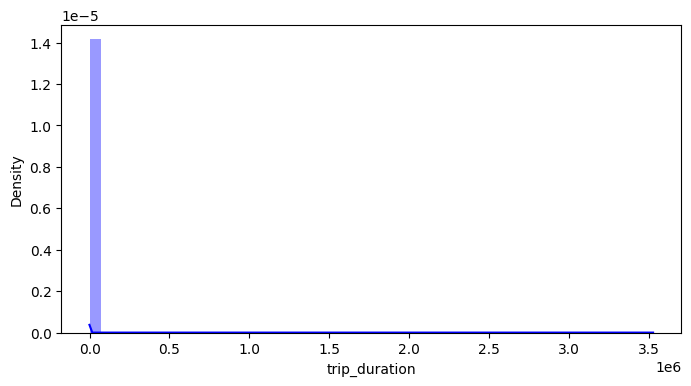

In [14]:
sns.distplot(data['trip_duration'], color = 'b')
plt.show()

In [15]:
data['trip_duration'].skew()

343.1639435917362

As we can see, the variable has an extremely high skew

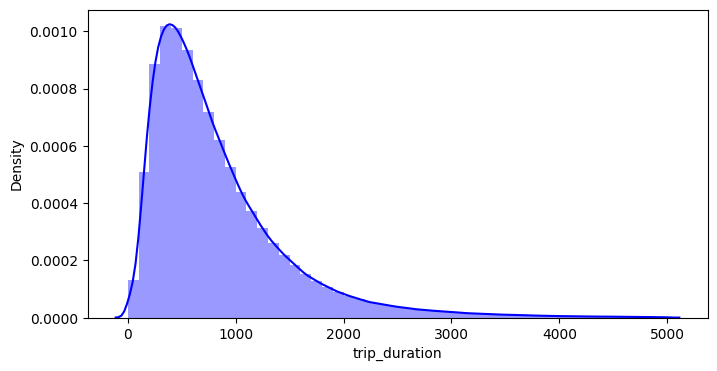

In [16]:
# Trying to visualize the data excluding the extreme values
x = data[data['trip_duration'] <= 5000]
sns.distplot(x['trip_duration'], color = 'b')
plt.show()

Now just for visualization purpose, I chose a random value of 5000, however to properly select a cutoff, a clear boundary needs to be defined. So, we check percentile values.

In [17]:
# Percentile values:
per = {}
for i in range(0, 100, 5):
  x = data['trip_duration']
  x = np.sort(x)
  per[i] = x[int(len(x)*(i/100))]
per[100] = x[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0  Percentile => 1
5  Percentile => 180
10  Percentile => 245
15  Percentile => 298
20  Percentile => 348
25  Percentile => 397
30  Percentile => 446
35  Percentile => 496
40  Percentile => 548
45  Percentile => 603
50  Percentile => 662
55  Percentile => 727
60  Percentile => 798
65  Percentile => 877
70  Percentile => 968
75  Percentile => 1075
80  Percentile => 1208
85  Percentile => 1383
90  Percentile => 1634
95  Percentile => 2104
100  Percentile => 3526282


In [18]:
# Display first and last percentile values:
per = {}
for i in range(0, 11):
  x = data['trip_duration']
  x = np.sort(x)
  per[i/10] = x[int(len(x)*(i/1000))]
for i in range(990, 1000):
  x = data['trip_duration']
  x = np.sort(x)
  per[i/10] = x[int(len(x)*(i/1000))]
per[100] = x[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0.0  Percentile => 1
0.1  Percentile => 7
0.2  Percentile => 15
0.3  Percentile => 26
0.4  Percentile => 38
0.5  Percentile => 50
0.6  Percentile => 60
0.7  Percentile => 69
0.8  Percentile => 75
0.9  Percentile => 81
1.0  Percentile => 87
99.0  Percentile => 3440
99.1  Percentile => 3540
99.2  Percentile => 3652
99.3  Percentile => 3782
99.4  Percentile => 3942
99.5  Percentile => 4139
99.6  Percentile => 4403
99.7  Percentile => 4765
99.8  Percentile => 5552
99.9  Percentile => 85129
100  Percentile => 3526282


As we can see, first 0.5 percentile values are below 50s. Also the last 0.5 percentile values are above 69 minutes.  We trim the data and remove these 1% values to maintain data integrity and keep it realistic, at the same time reducing skew significantly.

In [19]:
# Setting Trip duration upper limit
data = data[data.trip_duration <= 4139]
data = data[data.trip_duration >= 50]

In [20]:
data.shape

(1444166, 21)

A total of 15187 invalid values deleted out of 1458644 values.

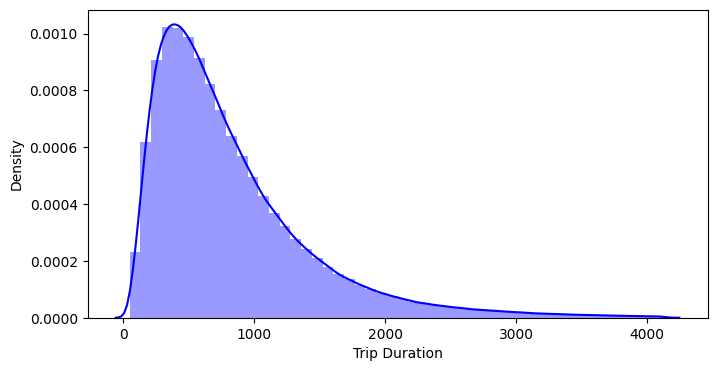

In [21]:
# Distribution plot for trip duration after setting upper limit
sns.distplot(data['trip_duration'], color = 'b')
plt.xlabel('Trip Duration')
plt.show()

In [22]:
data['trip_duration'].skew()

1.745480592004973

As we can see, the skew is significantly Reduced.

**2. Trip Distance**

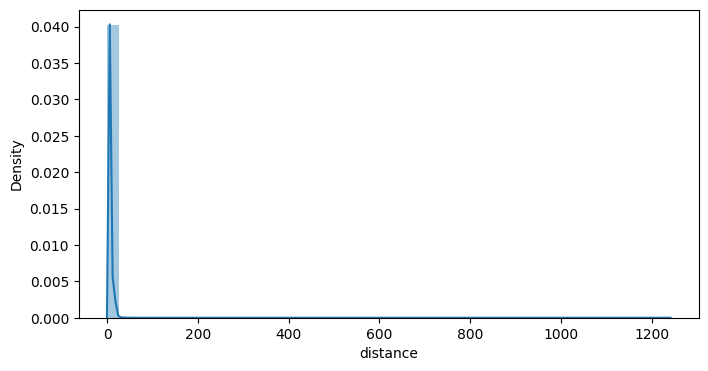

In [23]:
sns.distplot(data['distance'])
plt.show()

In [24]:
data['distance'].skew()

35.34145571286736

In [25]:
# Checking Percentile values:
per = {}
for i in range(0, 100, 5):
  x = data['distance']
  x = np.sort(x)
  per[i] = x[int(len(x)*(i/100))]
per[100] = x[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0  Percentile => 0.0
5  Percentile => 0.6175652321569878
10  Percentile => 0.8058587319109362
15  Percentile => 0.9563596910903245
20  Percentile => 1.0991174353537267
25  Percentile => 1.2399887757587091
30  Percentile => 1.3869839628133551
35  Percentile => 1.5436235567308036
40  Percentile => 1.711786261498196
45  Percentile => 1.893650163747408
50  Percentile => 2.0969917035604
55  Percentile => 2.3278610979054397
60  Percentile => 2.596571672431768
65  Percentile => 2.9219303462644204
70  Percentile => 3.3278507591900217
75  Percentile => 3.858289261219402
80  Percentile => 4.590065798796574
85  Percentile => 5.656129079769143
90  Percentile => 7.491032056132396
95  Percentile => 10.695620036809002
100  Percentile => 1240.9104296218293


In [26]:
# Display first and last percentile values:
per = {}
for i in range(0, 11):
  x = data['distance']
  x = np.sort(x)
  per[i/10] = x[int(len(x)*(i/1000))]
for i in range(990, 1000):
  x = data['distance']
  x = np.sort(x)
  per[i/10] = x[int(len(x)*(i/1000))]
per[100] = x[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0.0  Percentile => 0.0
0.1  Percentile => 0.0
0.2  Percentile => 0.0
0.3  Percentile => 0.0006429665689726801
0.4  Percentile => 0.028376135047969035
0.5  Percentile => 0.07687248603125527
0.6  Percentile => 0.13361943711510083
0.7  Percentile => 0.18164257981288492
0.8  Percentile => 0.2219462636479408
0.9  Percentile => 0.2519667927743483
1.0  Percentile => 0.2781932368058862
99.0  Percentile => 20.60594869944772
99.1  Percentile => 20.748084337576344
99.2  Percentile => 20.90293005471181
99.3  Percentile => 21.052954846901134
99.4  Percentile => 21.217615571903497
99.5  Percentile => 21.426850745179937
99.6  Percentile => 21.68555105681876
99.7  Percentile => 22.101212344435236
99.8  Percentile => 22.72816366670204
99.9  Percentile => 24.196428531015602
100  Percentile => 1240.9104296218293


A trip distance below 28 m doesn't make much sense. So we remove them, as it contributes to less than 0.4% of data.

Also, distance of above 25 km contributes to less than 0.1% of data, but contributes to high skew. So we see a more detailed visualization to choose a suitable cutoff point.

In [27]:
# Classifying data into 6 distance classes: < 28m (0.4 %ile), < 1km (20%ile), <25 km (99.9%ile), < 50km, <100km, >100km
x1 = data[data['distance'] <= 0.028]
x2 = data[(data['distance'] <= 10) & (data['distance'] > 0.028)]
x3 = data[(data['distance'] <= 25) & (data['distance'] > 10)]
x4 = data[(data['distance'] <= 50) & (data['distance'] > 25)]
x5 = data[(data['distance'] <= 100) & (data['distance'] > 50)]
x6 = data[data['distance'] > 100]
print('No. of data points with distance <= 28 m: \t', x1.shape[0])
print('No. of data points with distance between 0.028 and 10 km: \t', x2.shape[0])
print('No. of data points with distance between 10 and 25 km: \t', x3.shape[0])
print('No. of data points with distance between 25 and 50 km: \t', x4.shape[0])
print('No. of data points with distance between 50 and 100 km: \t', x5.shape[0])
print('No. of data points with distance > 100 km: \t', x6.shape[0])

No. of data points with distance <= 28 m: 	 5761
No. of data points with distance between 0.028 and 10 km: 	 1353973
No. of data points with distance between 10 and 25 km: 	 83240
No. of data points with distance between 25 and 50 km: 	 1150
No. of data points with distance between 50 and 100 km: 	 29
No. of data points with distance > 100 km: 	 13


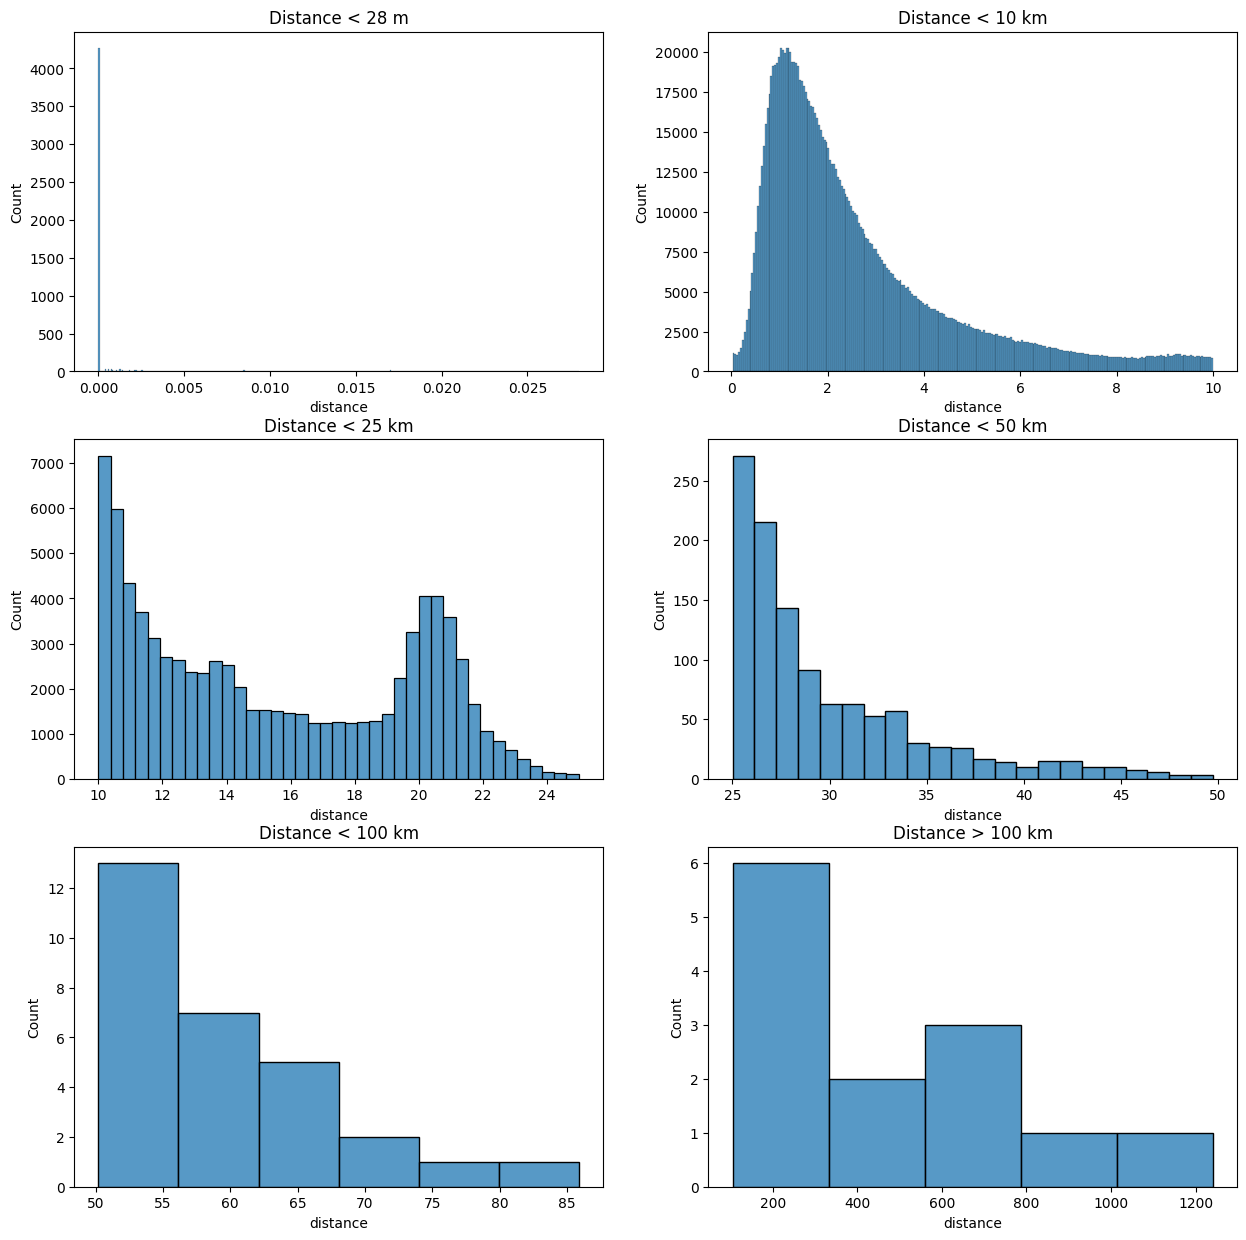

In [28]:
# Plot to visualize distribution of distance classes
plt.figure(figsize = (15, 15))
plt.subplot(3, 2, 1)
sns.histplot(x1['distance'])
plt.title('Distance < 28 m')
plt.subplot(3, 2, 2)
sns.histplot(x2['distance'])
plt.title('Distance < 10 km')
plt.subplot(3, 2, 3)
sns.histplot(x3['distance'])
plt.title('Distance < 25 km')
plt.subplot(3, 2, 4)
sns.histplot(x4['distance'])
plt.title('Distance < 50 km')
plt.subplot(3, 2, 5)
sns.histplot(x5['distance'])
plt.title('Distance < 100 km')
plt.subplot(3, 2, 6)
sns.histplot(x6['distance'])
plt.title('Distance > 100 km')
plt.show()

Here, we can see that there are quite a few values upto 50 kms, and very few above that (only 42 datapoints). Hence, we choose 50 km as cutoff threshold.

In [29]:
data = data[(data['distance'] >= 0.028)]
data = data[data['distance'] <= 50]

A total of 5803 values were removed.

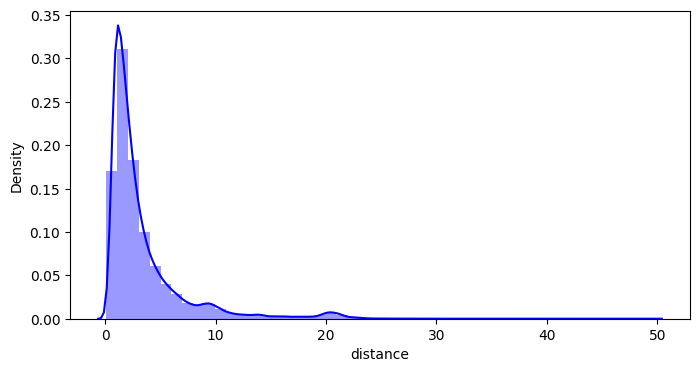

In [30]:
sns.distplot(data['distance'], color = 'b')
plt.show()

**3. Speed Distribution**

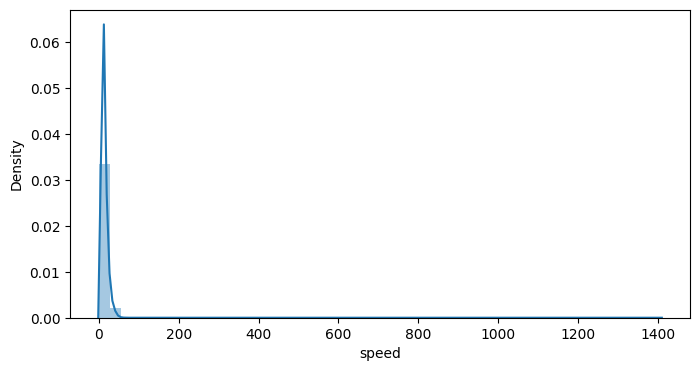

In [31]:
sns.distplot(data['speed'])
plt.show()

In [32]:
data['speed'].skew()

5.958362239295016

In [33]:
data['speed'].describe()

count    1.438363e+06
mean     1.447434e+01
std      7.803839e+00
min      2.983397e-02
25%      9.208637e+00
50%      1.284020e+01
75%      1.790108e+01
max      1.408107e+03
Name: speed, dtype: float64

In [34]:
# Checking Percentile values:
per = {}
for i in range(0, 100, 10):
  x = data['speed']
  x = np.sort(x)
  per[i] = x[int(len(x)*(i/100))]
per[100] = x[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0  Percentile => 0.02983397015330066
10  Percentile => 6.635424879446286
20  Percentile => 8.447695029042842
30  Percentile => 9.935185422075659
40  Percentile => 11.356921827851423
50  Percentile => 12.840203305475706
60  Percentile => 14.524492206073669
70  Percentile => 16.6073255565029
80  Percentile => 19.482372693146147
90  Percentile => 24.383639351351643
100  Percentile => 1408.1068271602608


Now obviously, a speed of 1408 kmph is too unrealistic and a value of 0.029 kmph is also unrealistic. So we will find a way to trim the values to be more realistic and for a smoother modelling.

In [35]:
# Display first and last percentile values:
per = {}
for i in range(0, 11):
  x = data['speed']
  x = np.sort(x)
  per[i/10] = x[int(len(x)*(i/1000))]
for i in range(990, 1000):
  x = data['speed']
  x = np.sort(x)
  per[i/10] = x[int(len(x)*(i/1000))]
per[100] = x[-1]
for i in per:
  print(i, ' Percentile =>', per[i])

0.0  Percentile => 0.02983397015330066
0.1  Percentile => 0.527653483364701
0.2  Percentile => 1.1739767618410024
0.3  Percentile => 1.6597538083085857
0.4  Percentile => 2.020374469565882
0.5  Percentile => 2.2933974392509464
0.6  Percentile => 2.5167903222869557
0.7  Percentile => 2.6947303184424474
0.8  Percentile => 2.8539135844745744
0.9  Percentile => 2.994676693840149
1.0  Percentile => 3.120797152431266
99.0  Percentile => 40.57415734829301
99.1  Percentile => 41.223282440863876
99.2  Percentile => 41.900338302932504
99.3  Percentile => 42.70282385042346
99.4  Percentile => 43.565844272967404
99.5  Percentile => 44.551632322026585
99.6  Percentile => 45.765919295766956
99.7  Percentile => 47.299563135827675
99.8  Percentile => 49.43000039105336
99.9  Percentile => 53.022556301766194
100  Percentile => 1408.1068271602608


In [36]:
# Classifying data into 4 speed classes: <1, 1-60, 60-100, 100+
x1 = data[data['speed'] <= 1]
x2 = data[(data['speed'] <= 60) & (data['speed'] > 1)]
x3 = data[(data['speed'] <= 100) & (data['speed'] > 60)]
x4 = data[data['speed'] > 100]
print('No. of data points with speed <= 1 kmph: \t', x1.shape[0])
print('No. of data points with speed between 5 and 60 kmph: \t', x2.shape[0])
print('No. of data points with speed between 60 and 100 kmph: \t', x3.shape[0])
print('No. of data points with speed > 100 kmph: \t', x4.shape[0])

No. of data points with speed <= 1 kmph: 	 2450
No. of data points with speed between 5 and 60 kmph: 	 1435525
No. of data points with speed between 60 and 100 kmph: 	 348
No. of data points with speed > 100 kmph: 	 40


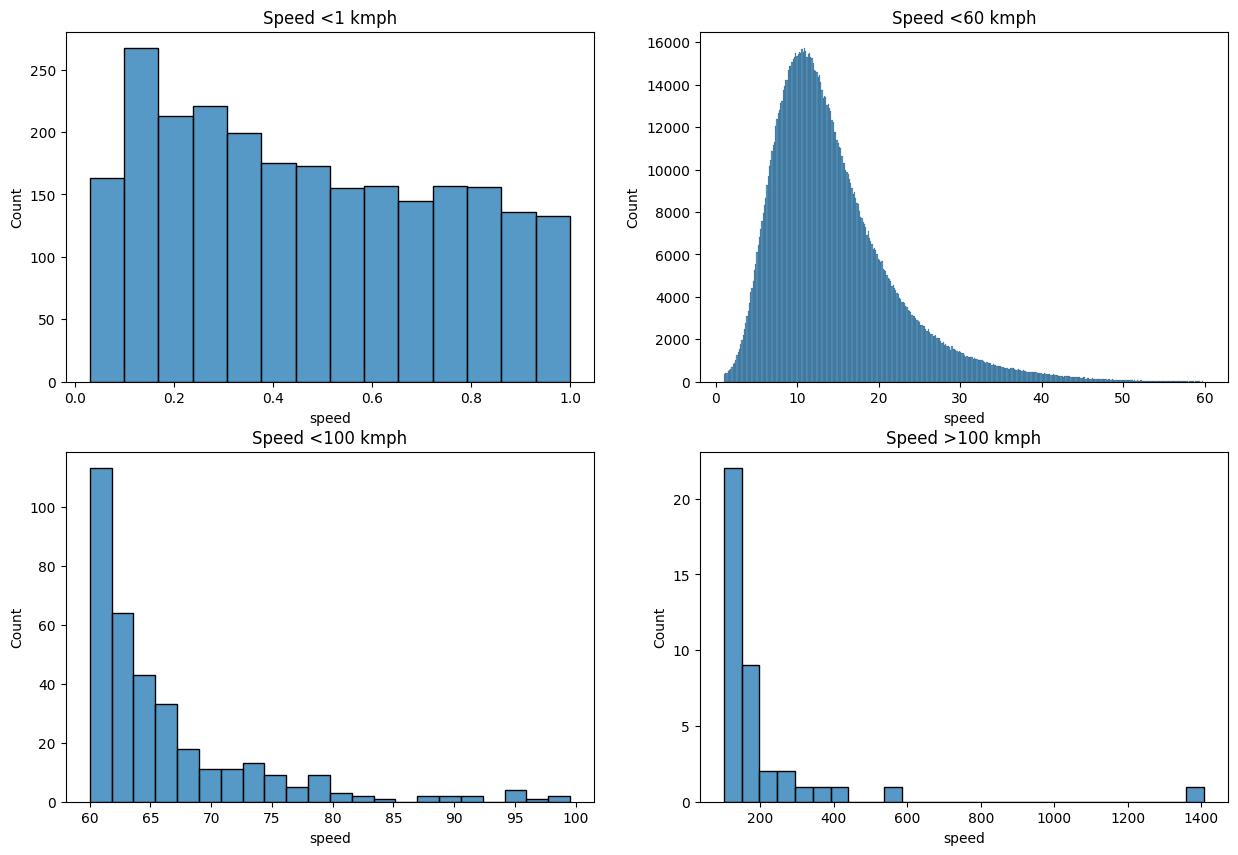

In [37]:
# Plot to visualize distribution of speed classes
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(x1['speed'])
plt.title('Speed <1 kmph')
plt.subplot(2, 2, 2)
sns.histplot(x2['speed'])
plt.title('Speed <60 kmph')
plt.subplot(2, 2, 3)
sns.histplot(x3['speed'])
plt.title('Speed <100 kmph')
plt.subplot(2, 2, 4)
sns.histplot(x4['speed'])
plt.title('Speed >100 kmph')
plt.show()

Removing speed values below 1 kmph and above 85 kmph. Together, they contribute to less than 0.2% of values. They are too extreme, non-uniform, and most importantly are most likely erroneous data.

(We chose 85 as a threshold, as we can see in the histogram, the count of values drops to zero, and after that the pattern is erratic and the count is low.)

In [38]:
data = data[data['speed'] >= 1]
data = data[data['speed'] <= 85]

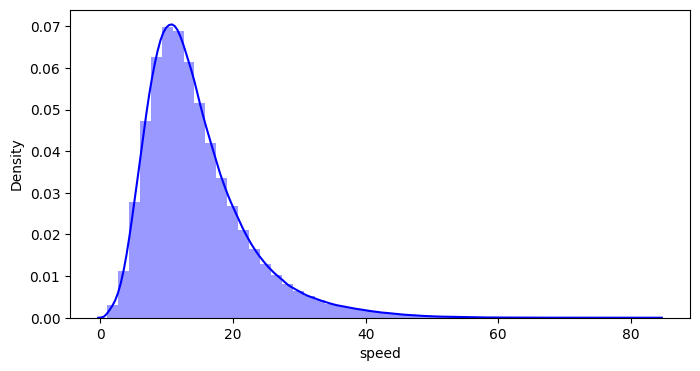

In [39]:
sns.distplot(data['speed'], color = 'b')
plt.show()

In [40]:
data['speed'].skew()

1.450280759987027

The skew has reduced significantly, and data is more realistic.

**4. Distribution amongst Vendors**

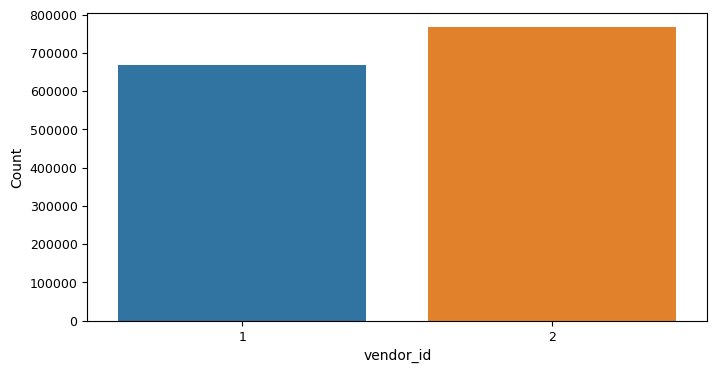

In [41]:
# Data distribution amongst vendors
sns.countplot(x = 'vendor_id', data = data)
plt.xticks(size = 9)
plt.yticks(size = 9)
plt.xlabel('vendor_id')
plt.ylabel('Count')
plt.show()

There's slightly more trips as reccorded by vendor 2 than by vendor 1, but not much significant difference.

**5. Passanger Count**

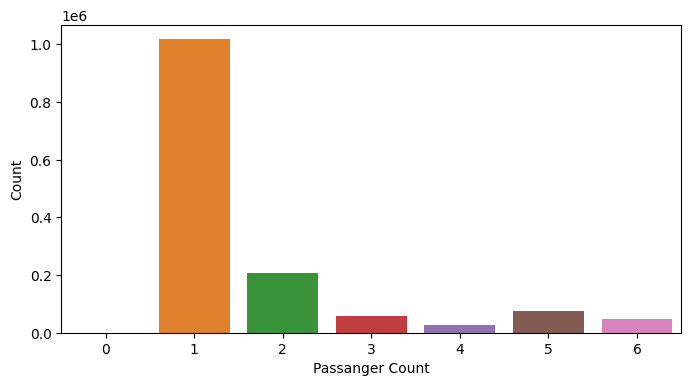

In [42]:
# Distribution of Passenger counts

sns.countplot(x = 'passenger_count', data = data)
plt.xlabel('Passanger Count')
plt.ylabel('Count')
plt.show()

In [43]:
passanger = data['passenger_count'].value_counts().reset_index().sort_values(by = ['index'])
passanger

index  passenger_count
6      0               14
0      1          1017377
1      2           207010
3      3            59023
5      4            27953
2      5            76953
4      6            47530

Now a trip with 0 Passangers doesn't make any sense and is most likely an error or an outlier. So we remove it.

In [44]:
data = data[data['passenger_count'] > 0]

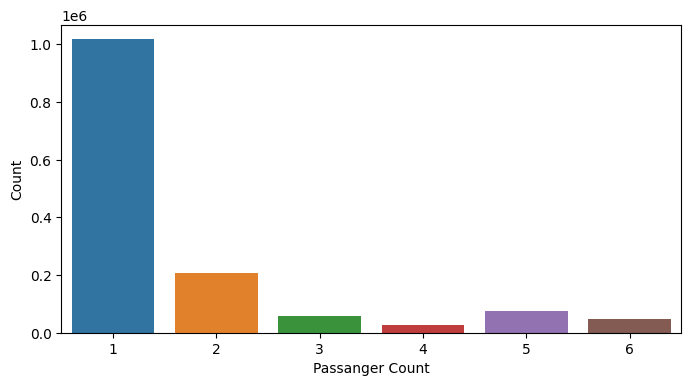

In [45]:
# New Passanger Count distribution

sns.countplot(x = 'passenger_count', data = data)
plt.xlabel('Passanger Count')
plt.ylabel('Count')
plt.show()

**6. Store and Fwd Flag**

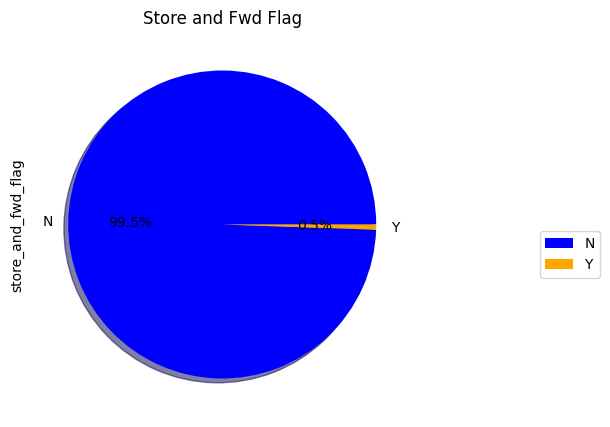

In [46]:
# Visualizing using Pie-Plot
plt.figure(figsize = (10, 5))
pie = data['store_and_fwd_flag'].value_counts(sort = True)
pie.plot(kind = 'pie', autopct = '%1.1f%%', legend = True, colors = ['blue', 'orange'], shadow = True)
plt.title('Store and Fwd Flag')
plt.legend(loc = 0, bbox_to_anchor = (1.5, 0.5))
plt.show()

Most of the data is not uploaded continuously and is stored locally (99.5%)

This could be due to the lack of internet availability in different areas or it could be due to discharging of the GPS or mobile device.

**7. Pick and Dropoff Time Data**

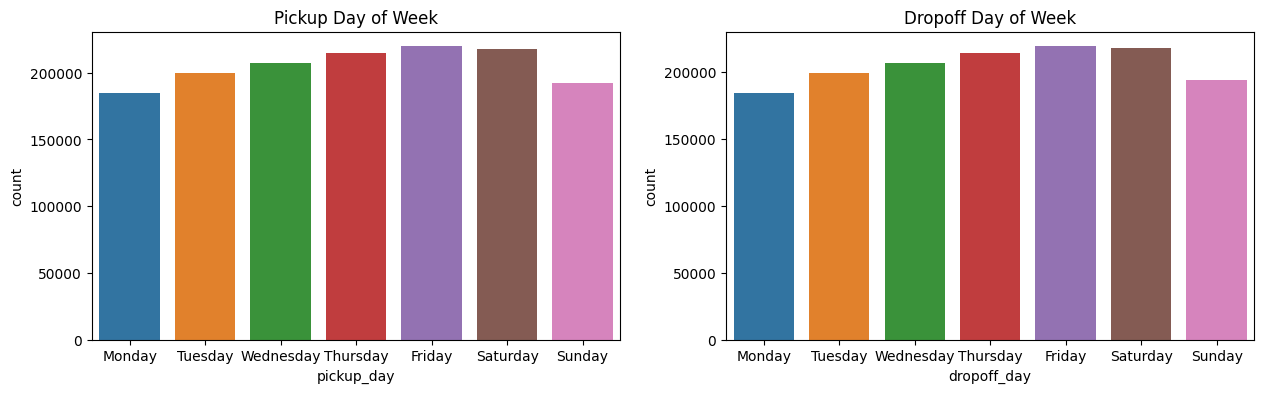

In [47]:
# Visualizing weekday distribution of trips
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.countplot(x = 'pickup_day', data = data, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Pickup Day of Week')
plt.subplot(1, 2, 2)
sns.countplot(x = 'dropoff_day', data = data, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Dropoff Day of Week')
plt.show()

As we can see from the data, most trips are taken on Friday and Saturday, whil least trips are taken on Sunday and Monday. There seems to be a smooth transition of increase and then decrease in the number of trips taken during the week, increasing from Monday to Friday, and then Decreasing from Friday to Monday.

Reasons for this could be the weekend, when commuters take more cabs  compared to weekdays, when they might be taking bus, or personal transport, as office times and routes are fixed, while weekends require more mobility and flexibility in travel routes and times.

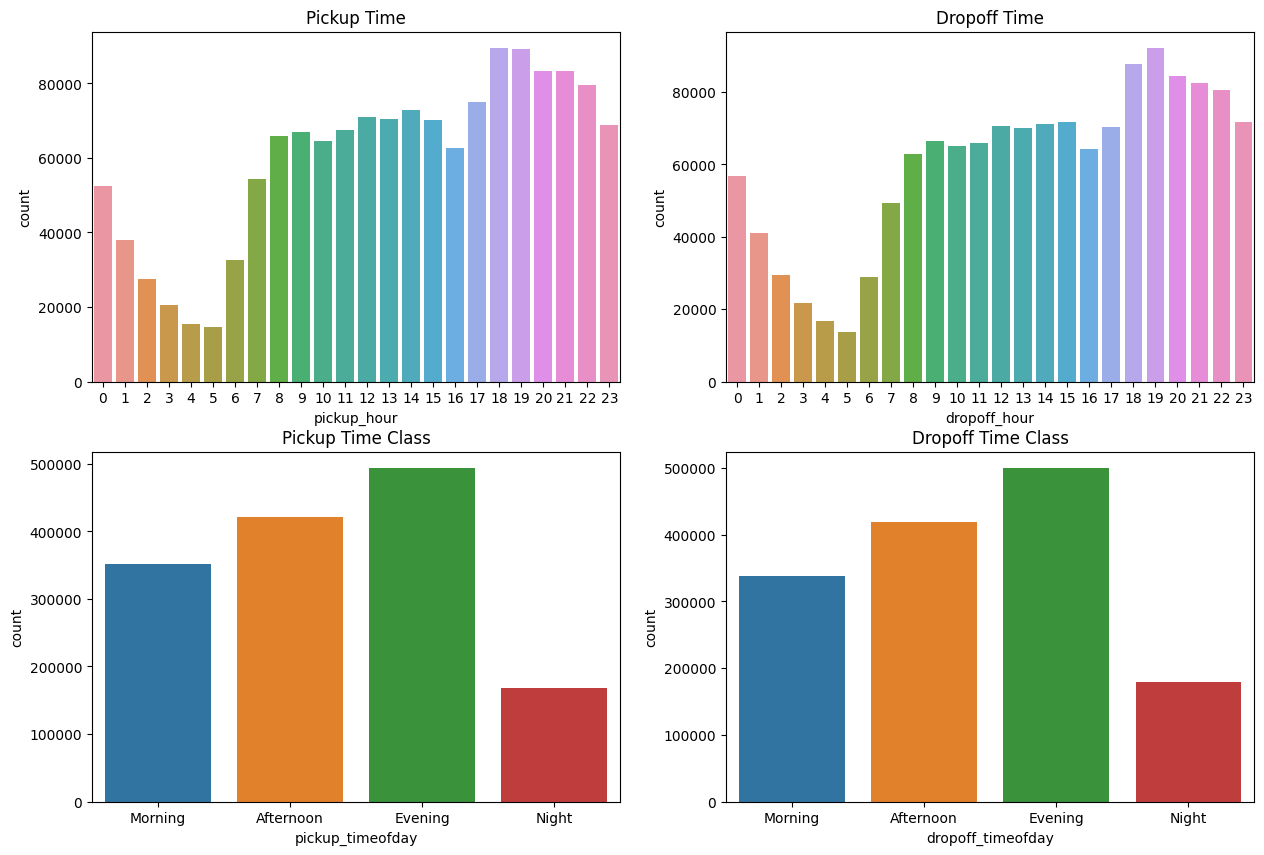

In [48]:
# Visualizing the daily time distribution of cab data.
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x = 'pickup_hour', data = data)
plt.title('Pickup Time')
plt.subplot(2, 2, 2)
sns.countplot(x = 'dropoff_hour', data = data)
plt.title('Dropoff Time')
plt.subplot(2, 2, 3)
sns.countplot(x = 'pickup_timeofday', data = data, order = ['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Pickup Time Class')
plt.subplot(2, 2, 4)
sns.countplot(x = 'dropoff_timeofday', data = data, order = ['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Dropoff Time Class')
plt.show()

Following insights can be gathered from the data:
* As we can see from the first 2 graphs, the highest number of trips are taken between 6 to 8 pm in the evening. Similarly, the lowest number of trips are taken between 4 to 6 am in the night.

* The trip data clearly shows a pattern of constantly increasing number of trips from Morning to Evening, and then rapidly decreasing during the night.

* It can be seen from the bottom 2 graphs, that the highest number of trips are taken during the Evening making it the busiest time of the day, followed by the Afternoon, then Morning, and then the Night time, which is the most idle time with least number of travellers.

It might be interesting to see if there is a difference in the time distribution between weekdays and weekends. So next graph we plot is the time distribution classified by weekdays and weekends.

In [49]:
# Creating Pickup and Dropoff Day number column to visualize Weekdays vs Weekends
data['pickup_dayno'] = data['pickup_datetime'].dt.weekday
data['dropoff_dayno'] = data['dropoff_datetime'].dt.weekday

# Monday to Thursday: Weekday  and  Friday to Sunday: Weekend
pick_weekday = data[(data['pickup_dayno'] <= 3)]
pick_weekend = data[(data['pickup_dayno'] > 3)]

drop_weekday = data[(data['dropoff_dayno'] <= 3)]
drop_weekend = data[(data['dropoff_dayno'] > 3)]

In [50]:
# Checking the number of datapoints available in each class
print('No. of datapoints for Weekday pickups:', pick_weekday.shape[0])
print('No. of datapoints for Weekday dropoffs:', drop_weekday.shape[0])
print('No. of datapoints for Weekend pickups:', pick_weekend.shape[0])
print('No. of datapoints for Weekend dropoffs:', drop_weekend.shape[0])

No. of datapoints for Weekday pickups: 805729
No. of datapoints for Weekday dropoffs: 804329
No. of datapoints for Weekend pickups: 630117
No. of datapoints for Weekend dropoffs: 631517


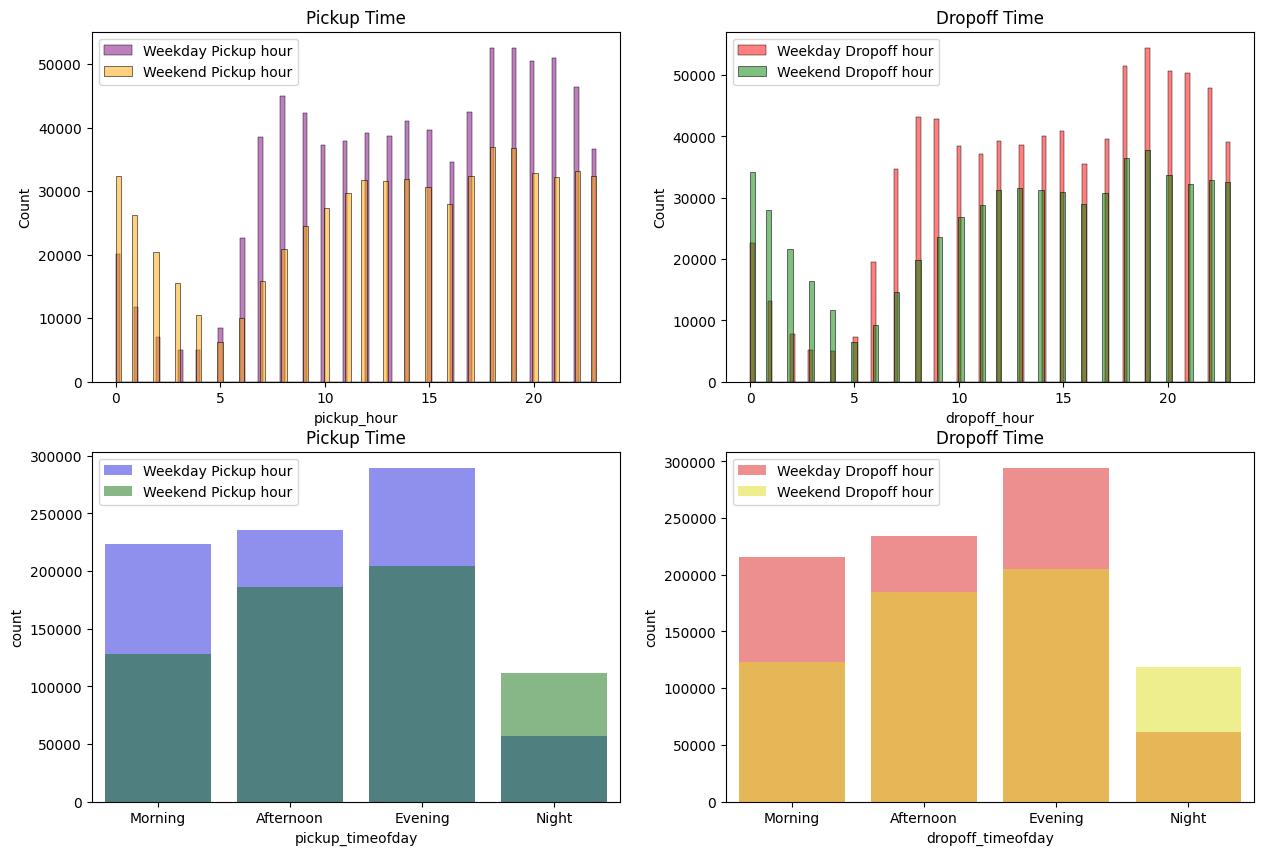

In [51]:
# Visualizing Weekday and Weekend Taxi pickup and dropoff time Distribution overlapping over each other
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.histplot(x = 'pickup_hour', data = pick_weekday, alpha = 0.5, label = 'Weekday Pickup hour', color = 'purple')
plt.title('Pickup Time')
sns.histplot(x = 'pickup_hour', data = pick_weekend, alpha = 0.5, label = 'Weekend Pickup hour', color = 'orange')
plt.title('Pickup Time')
plt.legend(loc='upper left')
plt.subplot(2, 2, 2)
sns.histplot(x = 'dropoff_hour', data = drop_weekday, alpha = 0.5, label = 'Weekday Dropoff hour', color = 'red')
plt.title('Dropoff Time')
sns.histplot(x = 'dropoff_hour', data = drop_weekend, alpha = 0.5, label = 'Weekend Dropoff hour', color = 'green')
plt.title('Dropoff Time')
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
sns.countplot(x = 'pickup_timeofday', data = pick_weekday, order = ['Morning', 'Afternoon', 'Evening', 'Night'], alpha = 0.5, label = 'Weekday Pickup hour', color = 'blue')
plt.title('Pickup Time')
sns.countplot(x = 'pickup_timeofday', data = pick_weekend, order = ['Morning', 'Afternoon', 'Evening', 'Night'], alpha = 0.5, label = 'Weekend Pickup hour', color = 'green')
plt.title('Pickup Time')
plt.legend(loc='upper left')
plt.subplot(2, 2, 4)
sns.countplot(x = 'dropoff_timeofday', data = drop_weekday, order = ['Morning', 'Afternoon', 'Evening', 'Night'], alpha = 0.5, label = 'Weekday Dropoff hour', color = 'red')
plt.title('Dropoff Time')
sns.countplot(x = 'dropoff_timeofday', data = drop_weekend, order = ['Morning', 'Afternoon', 'Evening', 'Night'], alpha = 0.5, label = 'Weekend Dropoff hour', color = 'yellow')
plt.title('Dropoff Time')
plt.legend(loc='upper left')
plt.show()

Here, we see a clear pattern:
* There are much much more number of trips during the night taken for the weekends, as both pickups as well as dropoffs show the same pattern.
* The same is seen in the bottom 2 graphs as well.
* The pattern exists despite the discrepancy in the number of datapoints, as there's more data in weekday than weekends as can be seen in the previous lines.

Hence, we can confidently conclude that people travel more at night during the weekends.

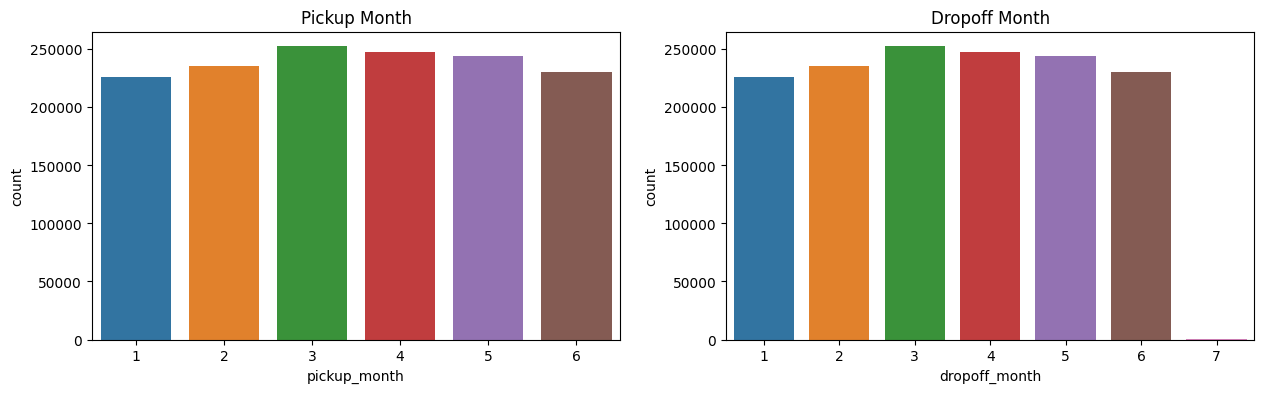

In [52]:
# Visualizing the monthly distribution of trips
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.countplot(x = 'pickup_month', data = data)
plt.title('Pickup Month')
plt.subplot(1, 2, 2)
sns.countplot(x = 'dropoff_month', data = data)
plt.title('Dropoff Month')
plt.show()

The data seems to be more or less uniformly distributed over many months, though a slight increase from January to March, and he a slight decrease March onwards can be observed.

**8. Pickup and Dropoff Location**

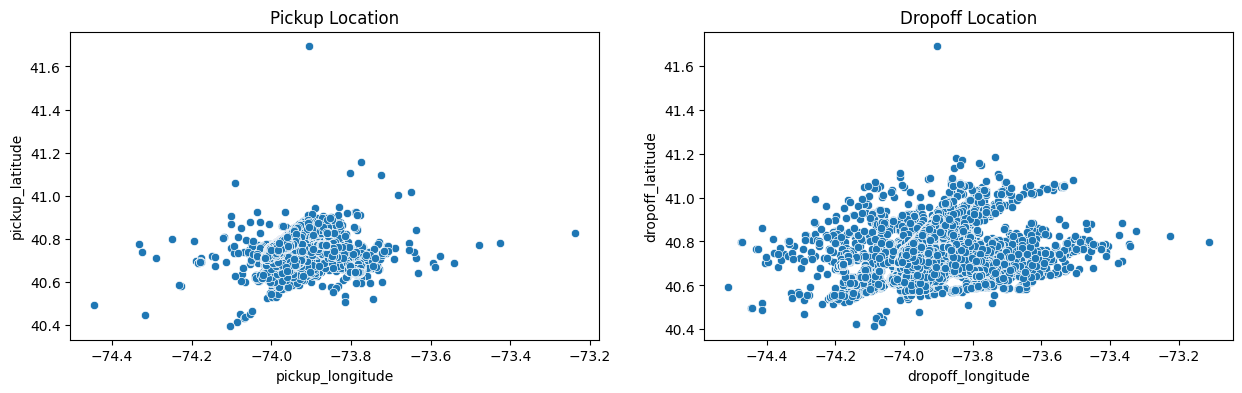

In [53]:
# Plotting the pickup and dropoff location distribution
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'pickup_longitude', y = 'pickup_latitude', data = data)
plt.title('Pickup Location')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'dropoff_longitude', y = 'dropoff_latitude', data = data)
plt.title('Dropoff Location')
plt.show()

### Bivariate Analysis

**1. Trip duration (Target Variable) vs all numerical columns**

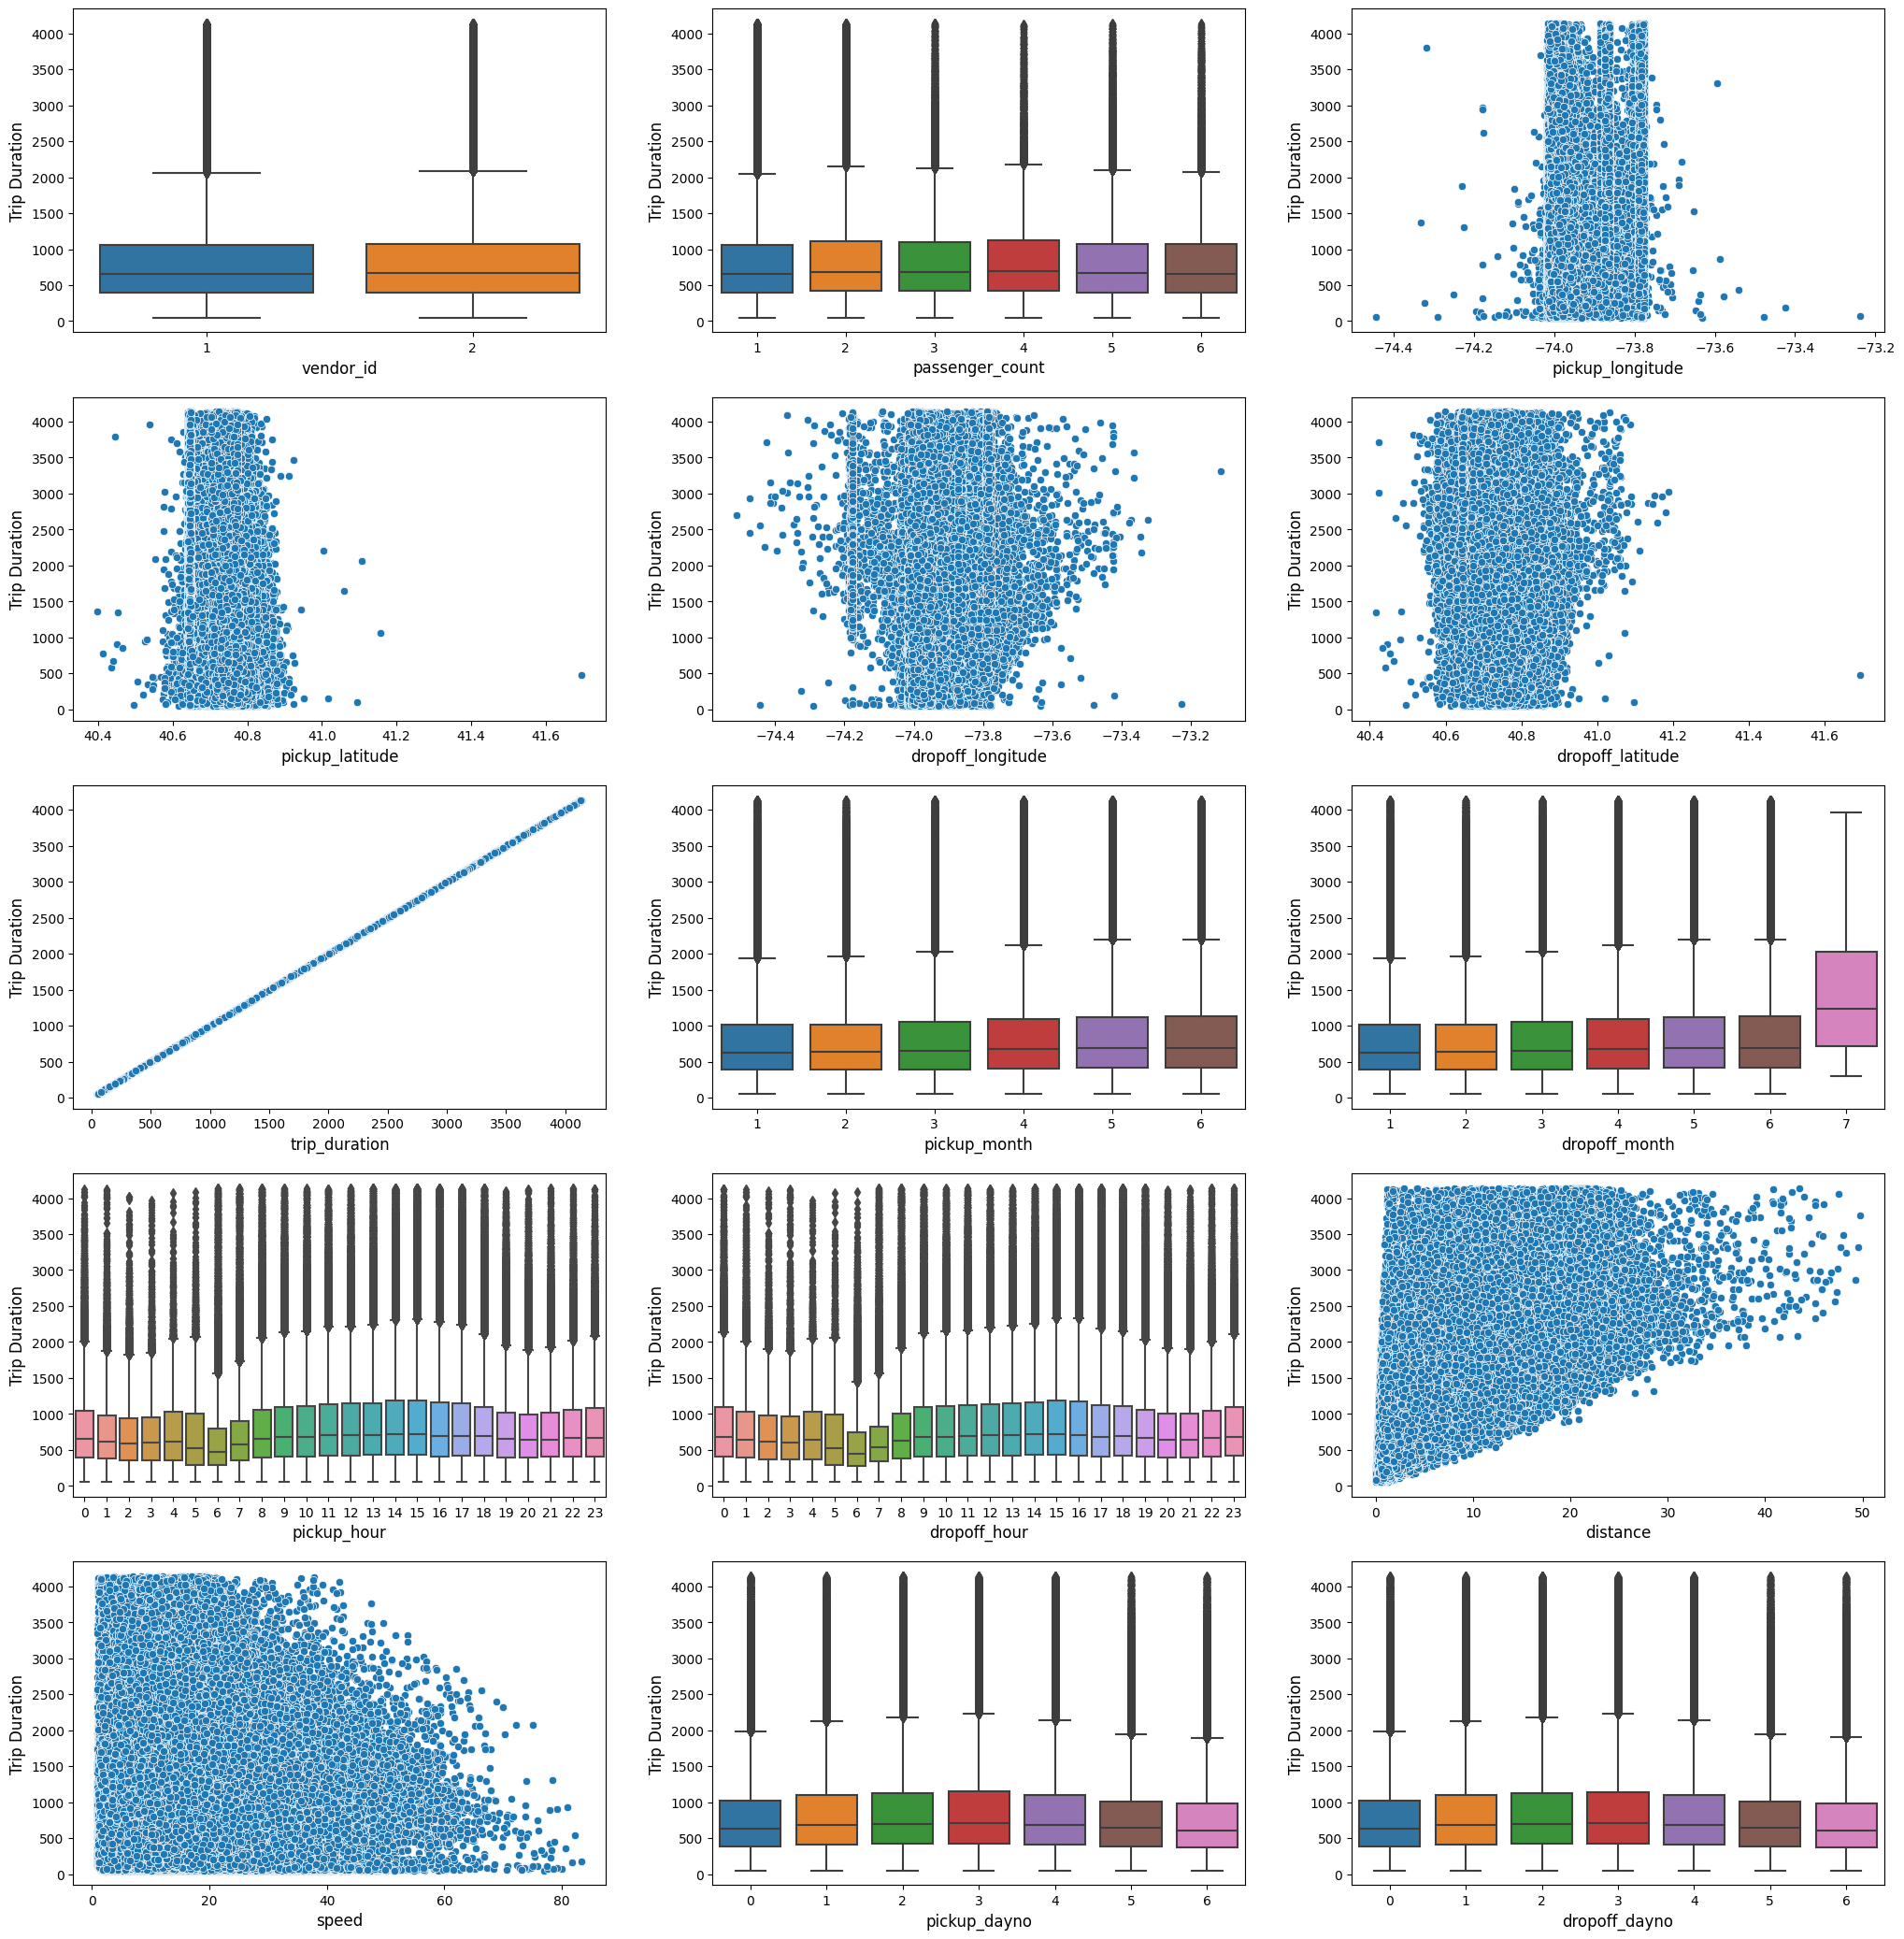

In [ ]:
# Creating a combined plot of all numerical variables against target variable trip duration

num = ['int64', 'float64']
num_cols = []
for i in  data.columns:
  if data[i].dtype in num:
    num_cols.append(i)

plt.figure(figsize = (25, 80))
sns.color_palette('husl')

for i, feature in enumerate(list(data[num_cols]), 1):
  plt.subplot(len(num_cols), 3, i)
  if data[feature].nunique() > 24:
    sns.scatterplot(x = feature, y = 'trip_duration', data = data)
  else:
    sns.boxplot(x = feature, y = 'trip_duration', data = data)
  plt.xlabel(f'{feature}', size = 12)
  plt.ylabel('Trip Duration', size = 12)
plt.show()

1. Not much difference observed between trip duration amongst vendors.
2. Not much visible difference between trip duration and passenger count.
3. Mo specific pattern in longitude and latitude distribution, most trips within new york.
4. Not much difference in pickup and dropoff months.
5. Small pattern detected in pickup and dropoff boxplots. Trips in the night between 2 to 6 am seem to be of a shorter duration with 6 am trips being shortest compared with the rest. Similar trend is seen in both pickup and dropoff hours.
6. Amongst different days of the week, Weekend trips seem to be of slightly shorter duration compared with Weekdays.
7. An increase in the trip duration with increasing distance and a decrease in trip duration with increasing speed observed.

Visualizing some graphs in depth for more insights.

**2. Trip duration vs Passenger Count**

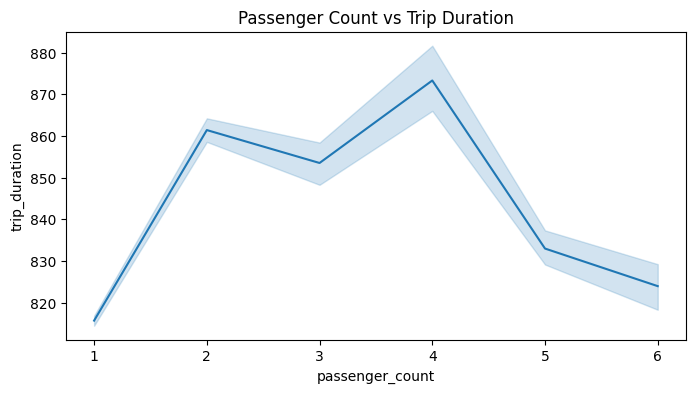

In [ ]:
# Passenger Count with Trip Duration
sns.lineplot(x = 'passenger_count', y = 'trip_duration', data = data)
plt.title('Passenger Count vs Trip Duration')
plt.show()

Although not much difference, cab rides seem relatively shorter for 1 and 6 passenger trips.

**3. Trip duration vs Distance and Speed**

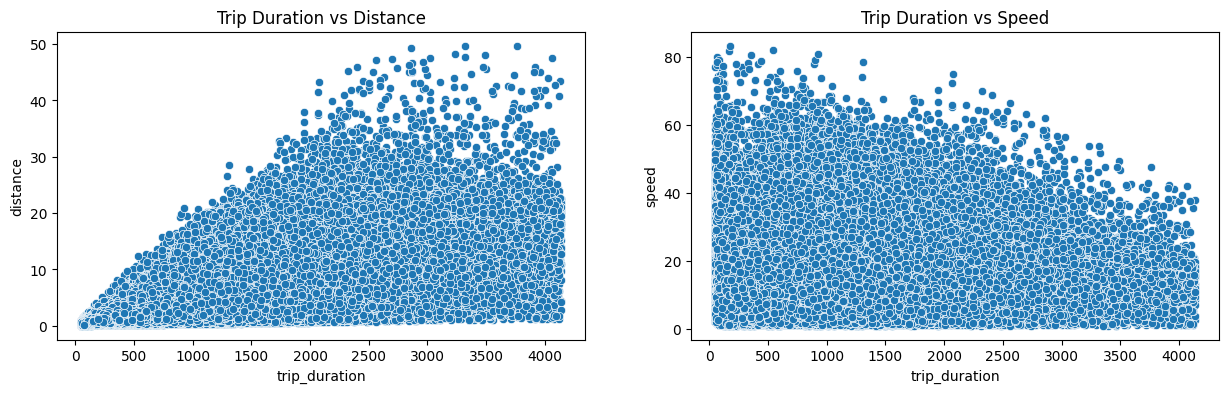

In [ ]:
# Visualizing the trip duration with distance and speed
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'trip_duration', y = 'distance', data = data)
plt.title('Trip Duration vs Distance')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'trip_duration', y = 'speed', data = data)
plt.title('Trip Duration vs Speed')
plt.show()

As we can see, there sems to be a general smooth trend of increasing distance with trip duration, which is obvious, longer distance should take longer time.

In trip duration vs speed graph, we see on an average a slight decreasing trend of speed with trip duration, that slower rides in general should take longer, which is logical.

In both graphs, there are ceiling to the values, which are due to the limits we have put on the data to eleminate outliers and unrealistic values.

**4. Trip duration vs Pickup and Dropoff Months, Weekday and Hour**

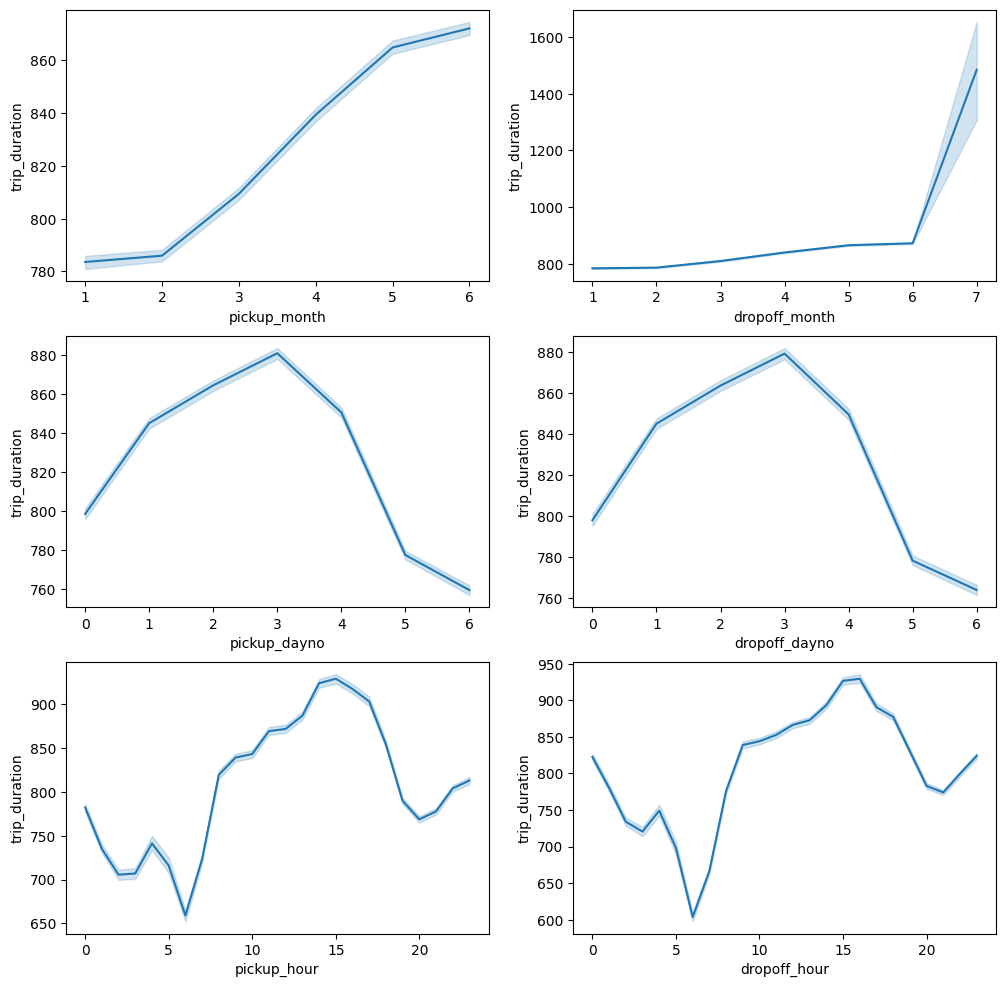

In [ ]:
# Distribution of Trip duration wrt months, weekday and hour
plt.figure(figsize = (12, 12))
plt.subplot(3, 2, 1)
sns.lineplot(x = 'pickup_month', y = 'trip_duration', data = data)
plt.subplot(3, 2, 2)
sns.lineplot(x = 'dropoff_month', y = 'trip_duration', data = data)
plt.subplot(3, 2, 3)
sns.lineplot(x = 'pickup_dayno', y = 'trip_duration', data = data)
plt.subplot(3, 2, 4)
sns.lineplot(x = 'dropoff_dayno', y = 'trip_duration', data = data)
plt.subplot(3, 2, 5)
sns.lineplot(x = 'pickup_hour', y = 'trip_duration', data = data)
plt.subplot(3, 2, 6)
sns.lineplot(x = 'dropoff_hour', y = 'trip_duration', data = data)
plt.show()

As can be seen from the graphs:
* Trip duration on an average increases slightly with time over months.
* Trips during weekends on an average are shorter than weekdays.
* Trips are relatively shorter during nighttime compared with afternoon with 6 am being time for shortest trips vs 3 pm being time for longest (On an average).

**5. Passenger Count vs Distance**

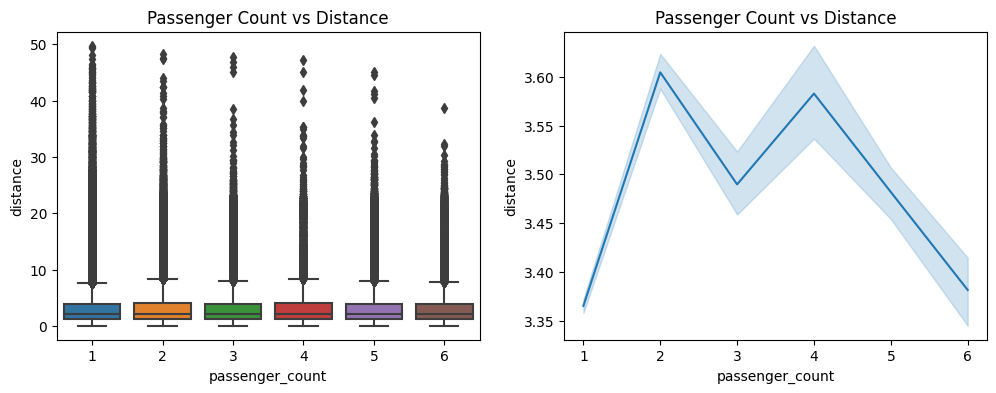

In [ ]:
# Visualizing the passenger count with distance
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x = 'passenger_count', y = 'distance', data = data)
plt.title('Passenger Count vs Distance')
plt.subplot(1, 2, 2)
sns.lineplot(x = 'passenger_count', y = 'distance', data = data)
plt.title('Passenger Count vs Distance')
plt.show()

**6. Passenger Count wrt Time of day**

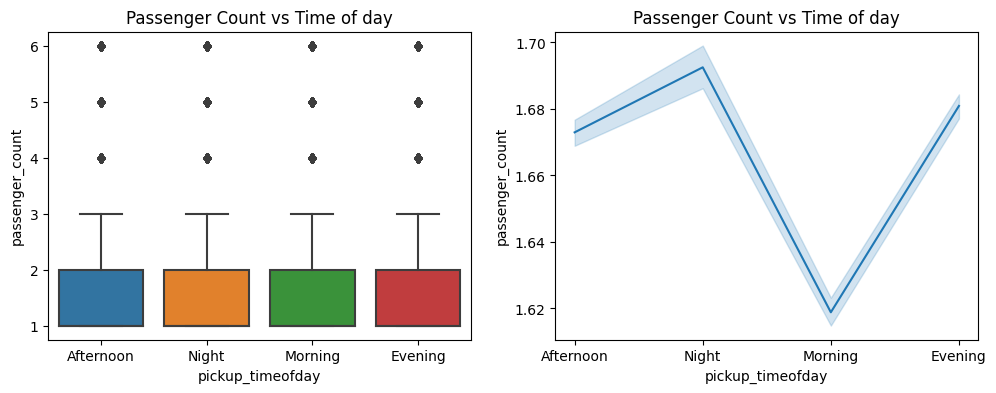

In [ ]:
# Visualizing the passenger count with distance
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x = 'pickup_timeofday', y = 'passenger_count', data = data)
plt.title('Passenger Count vs Time of day')
plt.subplot(1, 2, 2)
sns.lineplot(x = 'pickup_timeofday', y = 'passenger_count', data = data)
plt.title('Passenger Count vs Time of day')
plt.show()

Slightly less passengers in the morning

**7. Trip Duration vs Pickup and Dropoff Months, Weekday and Hour**

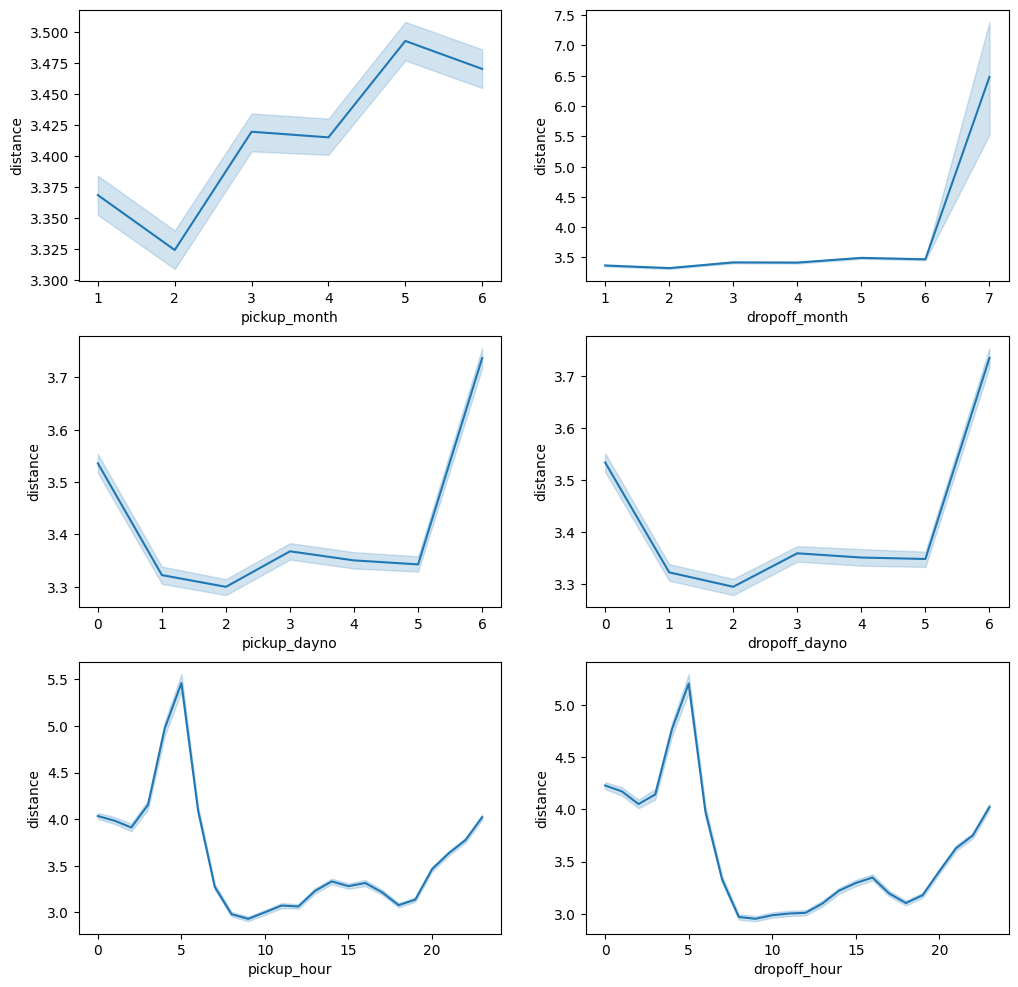

In [ ]:
# Distribution of Trip duration wrt months, weekday and hour
plt.figure(figsize = (12, 12))
plt.subplot(3, 2, 1)
sns.lineplot(x = 'pickup_month', y = 'distance', data = data)
plt.subplot(3, 2, 2)
sns.lineplot(x = 'dropoff_month', y = 'distance', data = data)
plt.subplot(3, 2, 3)
sns.lineplot(x = 'pickup_dayno', y = 'distance', data = data)
plt.subplot(3, 2, 4)
sns.lineplot(x = 'dropoff_dayno', y = 'distance', data = data)
plt.subplot(3, 2, 5)
sns.lineplot(x = 'pickup_hour', y = 'distance', data = data)
plt.subplot(3, 2, 6)
sns.lineplot(x = 'dropoff_hour', y = 'distance', data = data)
plt.show()

As can be seen from the graphs:
* On average, trip distance increases slightly over months.
* On average, trip distance is smaller for weekdays than for weekends.
* On average, trip distance is higher for the night than for the day, with 5 commuters taking longest trips and 8 to 11 am taking shortest trips.

Another thing that was observed was that time vs distance data showed interesting results when compared with time vs trip_duration data.
* Night trips are longer in distance but take shorter time. This could be due to the lack of traffic in the night.
* Weekend trips are shorter in distance as well as time taken for commute.
* Over months from January to June, both the trip distance as well as trip durations seem to be increasing. No immediate reason identified yet.

### Multivariate Analysis

In [ ]:
print(data.sample(5).to_string())

                id  vendor_id     pickup_datetime    dropoff_datetime  passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  pickup_month  dropoff_month  pickup_hour  dropoff_hour pickup_timeofday dropoff_timeofday  distance      speed  pickup_dayno  dropoff_dayno
21773    id2453876          1 2016-03-18 22:08:11 2016-03-18 22:12:12                1        -73.973717        40.763206         -73.977364         40.756363                  N            241     Friday      Friday             3              3           22            22          Evening           Evening  0.820623  12.258267             4              4
1189278  id1455173          2 2016-04-16 09:44:36 2016-04-16 09:49:33                1        -73.996384        40.723701         -74.009064         40.710732                  N            297   Saturday    Saturday             4              4            9             9          Morni

Features to handle before starting analysis:

1. *id* is unique for each column hence serves no purpose to our data except placeholder same as index.
2. *pickup_datetime* and *dropoff_datetime* have been used to extract all the information about date and time data, which is in different columns and hence serves no additional purpose.
3. *store_and_fwd_flag* contains binary values, and can be converted to int. Though 99.5% of it's values are 'N' making it probably useless, we can still visualize it with other variables and remove later.
4. *pickup_day* and *dropoff_day* variables are categorical data and can be converted using One Hot Encoding.
5. *pickup_timeofday* and *dropoff_timeofday* are also categorical and can be converted using One Hot Encoding. However they contain similar information as pickup hour and dropoff hour, and should be deleted (To be kept in mind).
6. *pickup_dayno* and *dropoff_dayno* contain the exact same information as *pickup_day* and *dropoff_day*. Hence they will be deleted to prevent redundancy. 

In [54]:
# Removing unnecessary and redundant data

data = data.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_dayno', 'dropoff_dayno'], axis = 1)
data.head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          2                1        -73.982155        40.767937   
1          1                1        -73.980415        40.738564   
2          2                1        -73.979027        40.763939   
3          2                1        -74.010040        40.719971   
4          2                1        -73.973053        40.793209   

   dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  \
0         -73.964630         40.765602                  N            455   
1         -73.999481         40.731152                  N            663   
2         -74.005333         40.710087                  N           2124   
3         -74.012268         40.706718                  N            429   
4         -73.972923         40.782520                  N            435   

  pickup_day dropoff_day  pickup_month  dropoff_month  pickup_hour  \
0     Monday      Monday             3              3           17   
1     Sunday      Sunday             6              6            0   
2    Tuesday     Tuesday             1              1           11   
3  Wednesday   Wednesday             4              4           19   
4   Saturday    Saturday             3              3           13   

   dropoff_hour pickup_timeofday dropoff_timeofday  distance      speed  
0            17        Afternoon         Afternoon  1.498523  11.856445  
1             0            Night             Night  1.805510   9.803673  
2            12          Morning         Afternoon  6.385108  10.822216  
3            19          Evening           Evening  1.485501  12.465739  
4            13        Afternoon         Afternoon  1.188590   9.836608

In [55]:
# Converting data into numerical datatypes for Analysis

data['store_and_fwd_flag'] = data['store_and_fwd_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [56]:
# One Hot Encoding to get dummies and convert data

data = pd.get_dummies(data, columns = ['pickup_day', 'dropoff_day', 'pickup_timeofday', 'dropoff_timeofday'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435846 entries, 0 to 1458643
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   vendor_id                    1435846 non-null  int64  
 1   passenger_count              1435846 non-null  int64  
 2   pickup_longitude             1435846 non-null  float64
 3   pickup_latitude              1435846 non-null  float64
 4   dropoff_longitude            1435846 non-null  float64
 5   dropoff_latitude             1435846 non-null  float64
 6   store_and_fwd_flag           1435846 non-null  int64  
 7   trip_duration                1435846 non-null  int64  
 8   pickup_month                 1435846 non-null  int64  
 9   dropoff_month                1435846 non-null  int64  
 10  pickup_hour                  1435846 non-null  int64  
 11  dropoff_hour                 1435846 non-null  int64  
 12  distance                     1435846 non-n

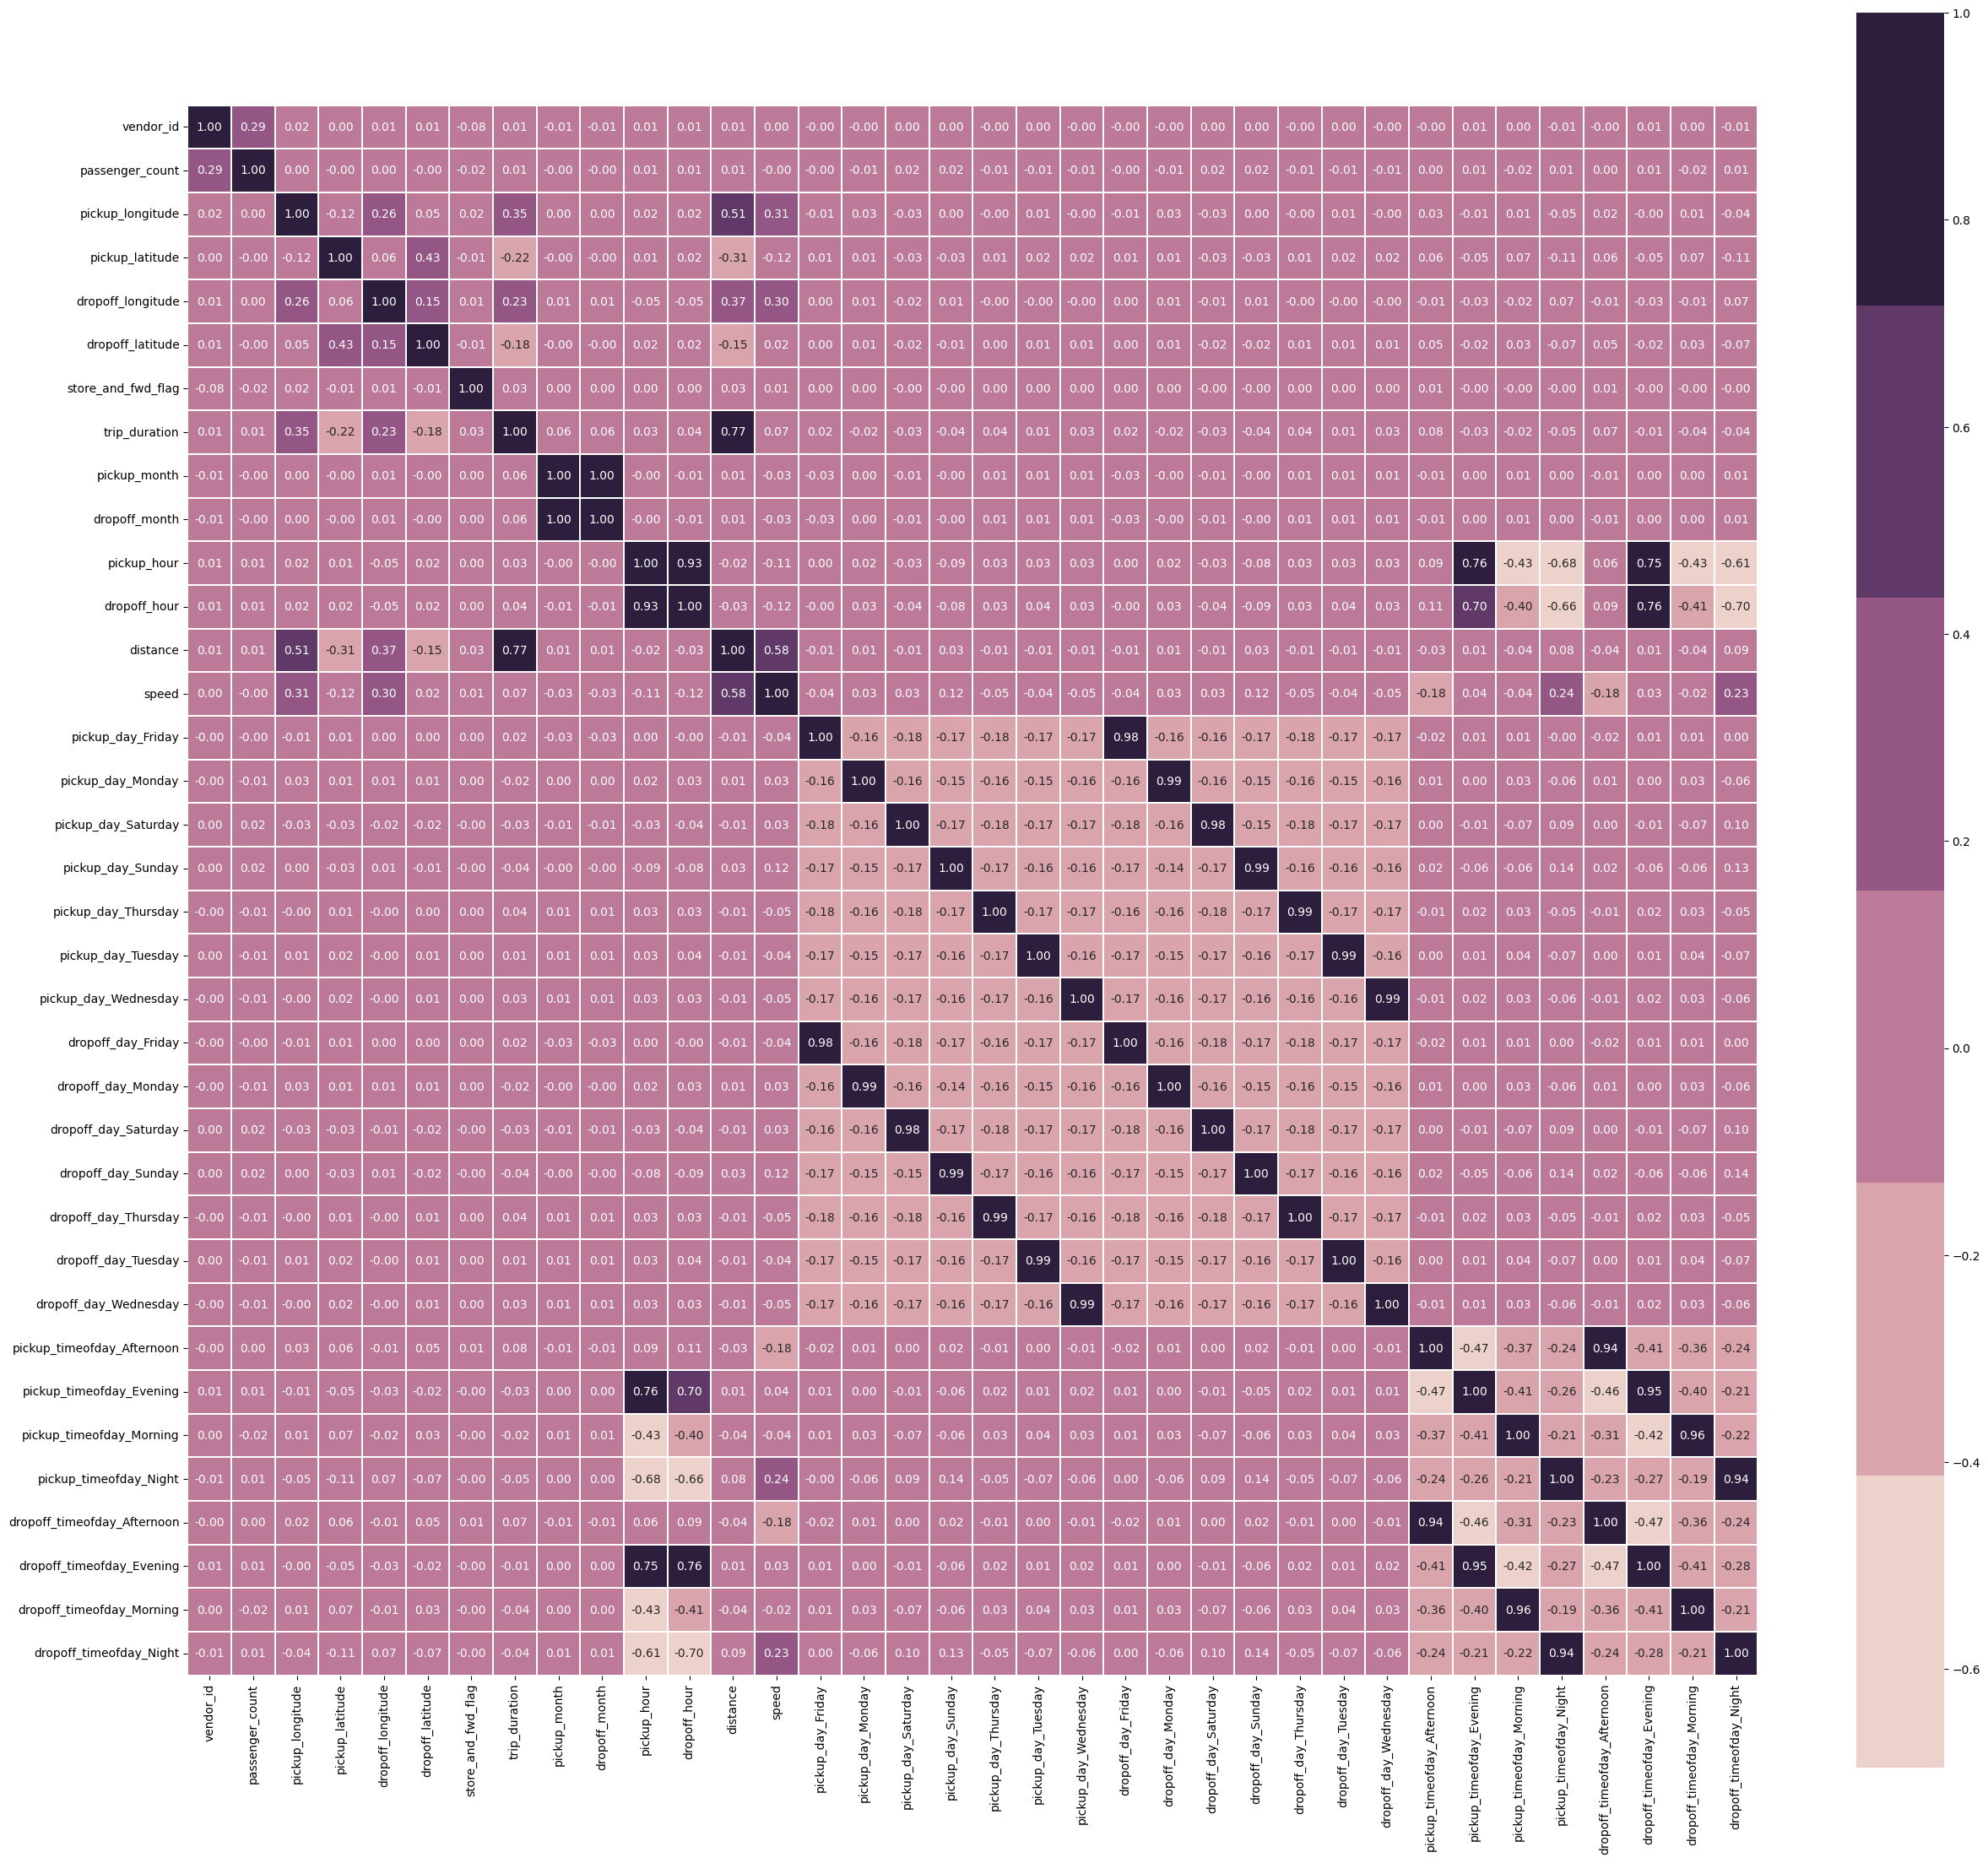

In [ ]:
# Creating a heatmap of correlation matrix
fig, axes = plt.subplots(figsize=(30, 30))
sns.heatmap(data.corr(), annot = True, ax = axes, linewidths = 0.1, fmt = '.2f', square = True, cbar_kws = {'shrink': 0.9}, cmap = sns.cubehelix_palette())
plt.show()

As we can see from the heatmap above, the plot shows the correlation between different variables.We get the following insights from the graph:

* VendorId and Passanger Count have a correlation of 0.29, meaning that Vendor-2 might be getting slightly more no. of passengers per trip on an average compared to Vendor-1.
* No other correlation between VendorID and any other variable. Same for Passenger Count.
* Pickup and Dropoff Longitude have some correlation with each other, as do Pickup and Dropoff Latitude. This is understandable as max trip distance is 50 km, and on a great circles scale, its pretty close.
* Both Pickup and Dropoff Longitudes have a mild positive correlation with speed, distance and time taken for the trip.
* Both Pickup and Dropoff Latitudes have mild negative correlation with distance and time taken for the trip.
* Both previous points mean that more trips and longer trips for longer distance are taken in the south-east region of the city.
* Store and Fwd Flag, Pickup and Dropoff Months have no correlation with any other variable in the whole data.
* Pickup and Dropoff hour are correlated with pickup and dropoff time of the day, which is simply obvious as hour is in 24 hour format, and latter is made using the former datapoints.
* There is a very significant strong correlation between the pickup and dropoff day of the week, and negligible negative correlation with all other days of week; which is perfectly understandable as most trips start and end on the same day.
* Pickup and dropoff time of day data is highly correlated with each other, which is understandable considering the short duration of trips.
* Each time slot is negatively correlated with others, which is obvious, as trip taken in one time slot means not taken in others. No additional information gained.

Now finally, we observe the trip distance and speed columns:
* Distance is positively correlated with pickup and dropoff longitudes. Meaning that trips from Easten regions are longer.
* Distance is negatively correlated with pickup and dropoff latitudes. Meaning that trips from Southern regions are longer.
* Speed is also positively correlated with pickup and dropoff longitudes. It could indicate suburban region in the East side of the city, as the people need to travel longer distance and trips are faster in speed, and take more time. It also means more straight roads, and less traffic.
* Speed and Distance are morderately correlated, meaning that longer trips are relatively faster in speed.
* Trip duration is strongly correlated with distance, which is understandable as longer distance should take longer time.
* Speed is mildly positively correlated with time of day data, with night time trips being relatively faster and afternoon trips being relatively slower.

## Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435846 entries, 0 to 1458643
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   vendor_id                    1435846 non-null  int64  
 1   passenger_count              1435846 non-null  int64  
 2   pickup_longitude             1435846 non-null  float64
 3   pickup_latitude              1435846 non-null  float64
 4   dropoff_longitude            1435846 non-null  float64
 5   dropoff_latitude             1435846 non-null  float64
 6   store_and_fwd_flag           1435846 non-null  int64  
 7   trip_duration                1435846 non-null  int64  
 8   pickup_month                 1435846 non-null  int64  
 9   dropoff_month                1435846 non-null  int64  
 10  pickup_hour                  1435846 non-null  int64  
 11  dropoff_hour                 1435846 non-null  int64  
 12  distance                     1435846 non-n

Now we can employ many methods to select features, but first to build our model, we need to differentiate between dependent and independent variables. We can see that ***trip_duration*** is our dependent feature.

All other features must be independent features. However the **speed** feature was created using trip duration as a parameter and is *dependent* on trip duration. Hence, we remove it from the list of independent features before starting the modelling process.

In [57]:
# Removing speed feature

data.drop(['speed'], inplace = True, axis = 1)

In [58]:
# Creating a list of Independent Variables
cols = list(data.columns)
cols.remove('trip_duration')
cols

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_month',
 'dropoff_month',
 'pickup_hour',
 'dropoff_hour',
 'distance',
 'pickup_day_Friday',
 'pickup_day_Monday',
 'pickup_day_Saturday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday',
 'dropoff_day_Friday',
 'dropoff_day_Monday',
 'dropoff_day_Saturday',
 'dropoff_day_Sunday',
 'dropoff_day_Thursday',
 'dropoff_day_Tuesday',
 'dropoff_day_Wednesday',
 'pickup_timeofday_Afternoon',
 'pickup_timeofday_Evening',
 'pickup_timeofday_Morning',
 'pickup_timeofday_Night',
 'dropoff_timeofday_Afternoon',
 'dropoff_timeofday_Evening',
 'dropoff_timeofday_Morning',
 'dropoff_timeofday_Night']

In [59]:
# Defining Dependent and Independent Variables
x = data[cols]
y = data['trip_duration']

#### Removing Multicollinearity

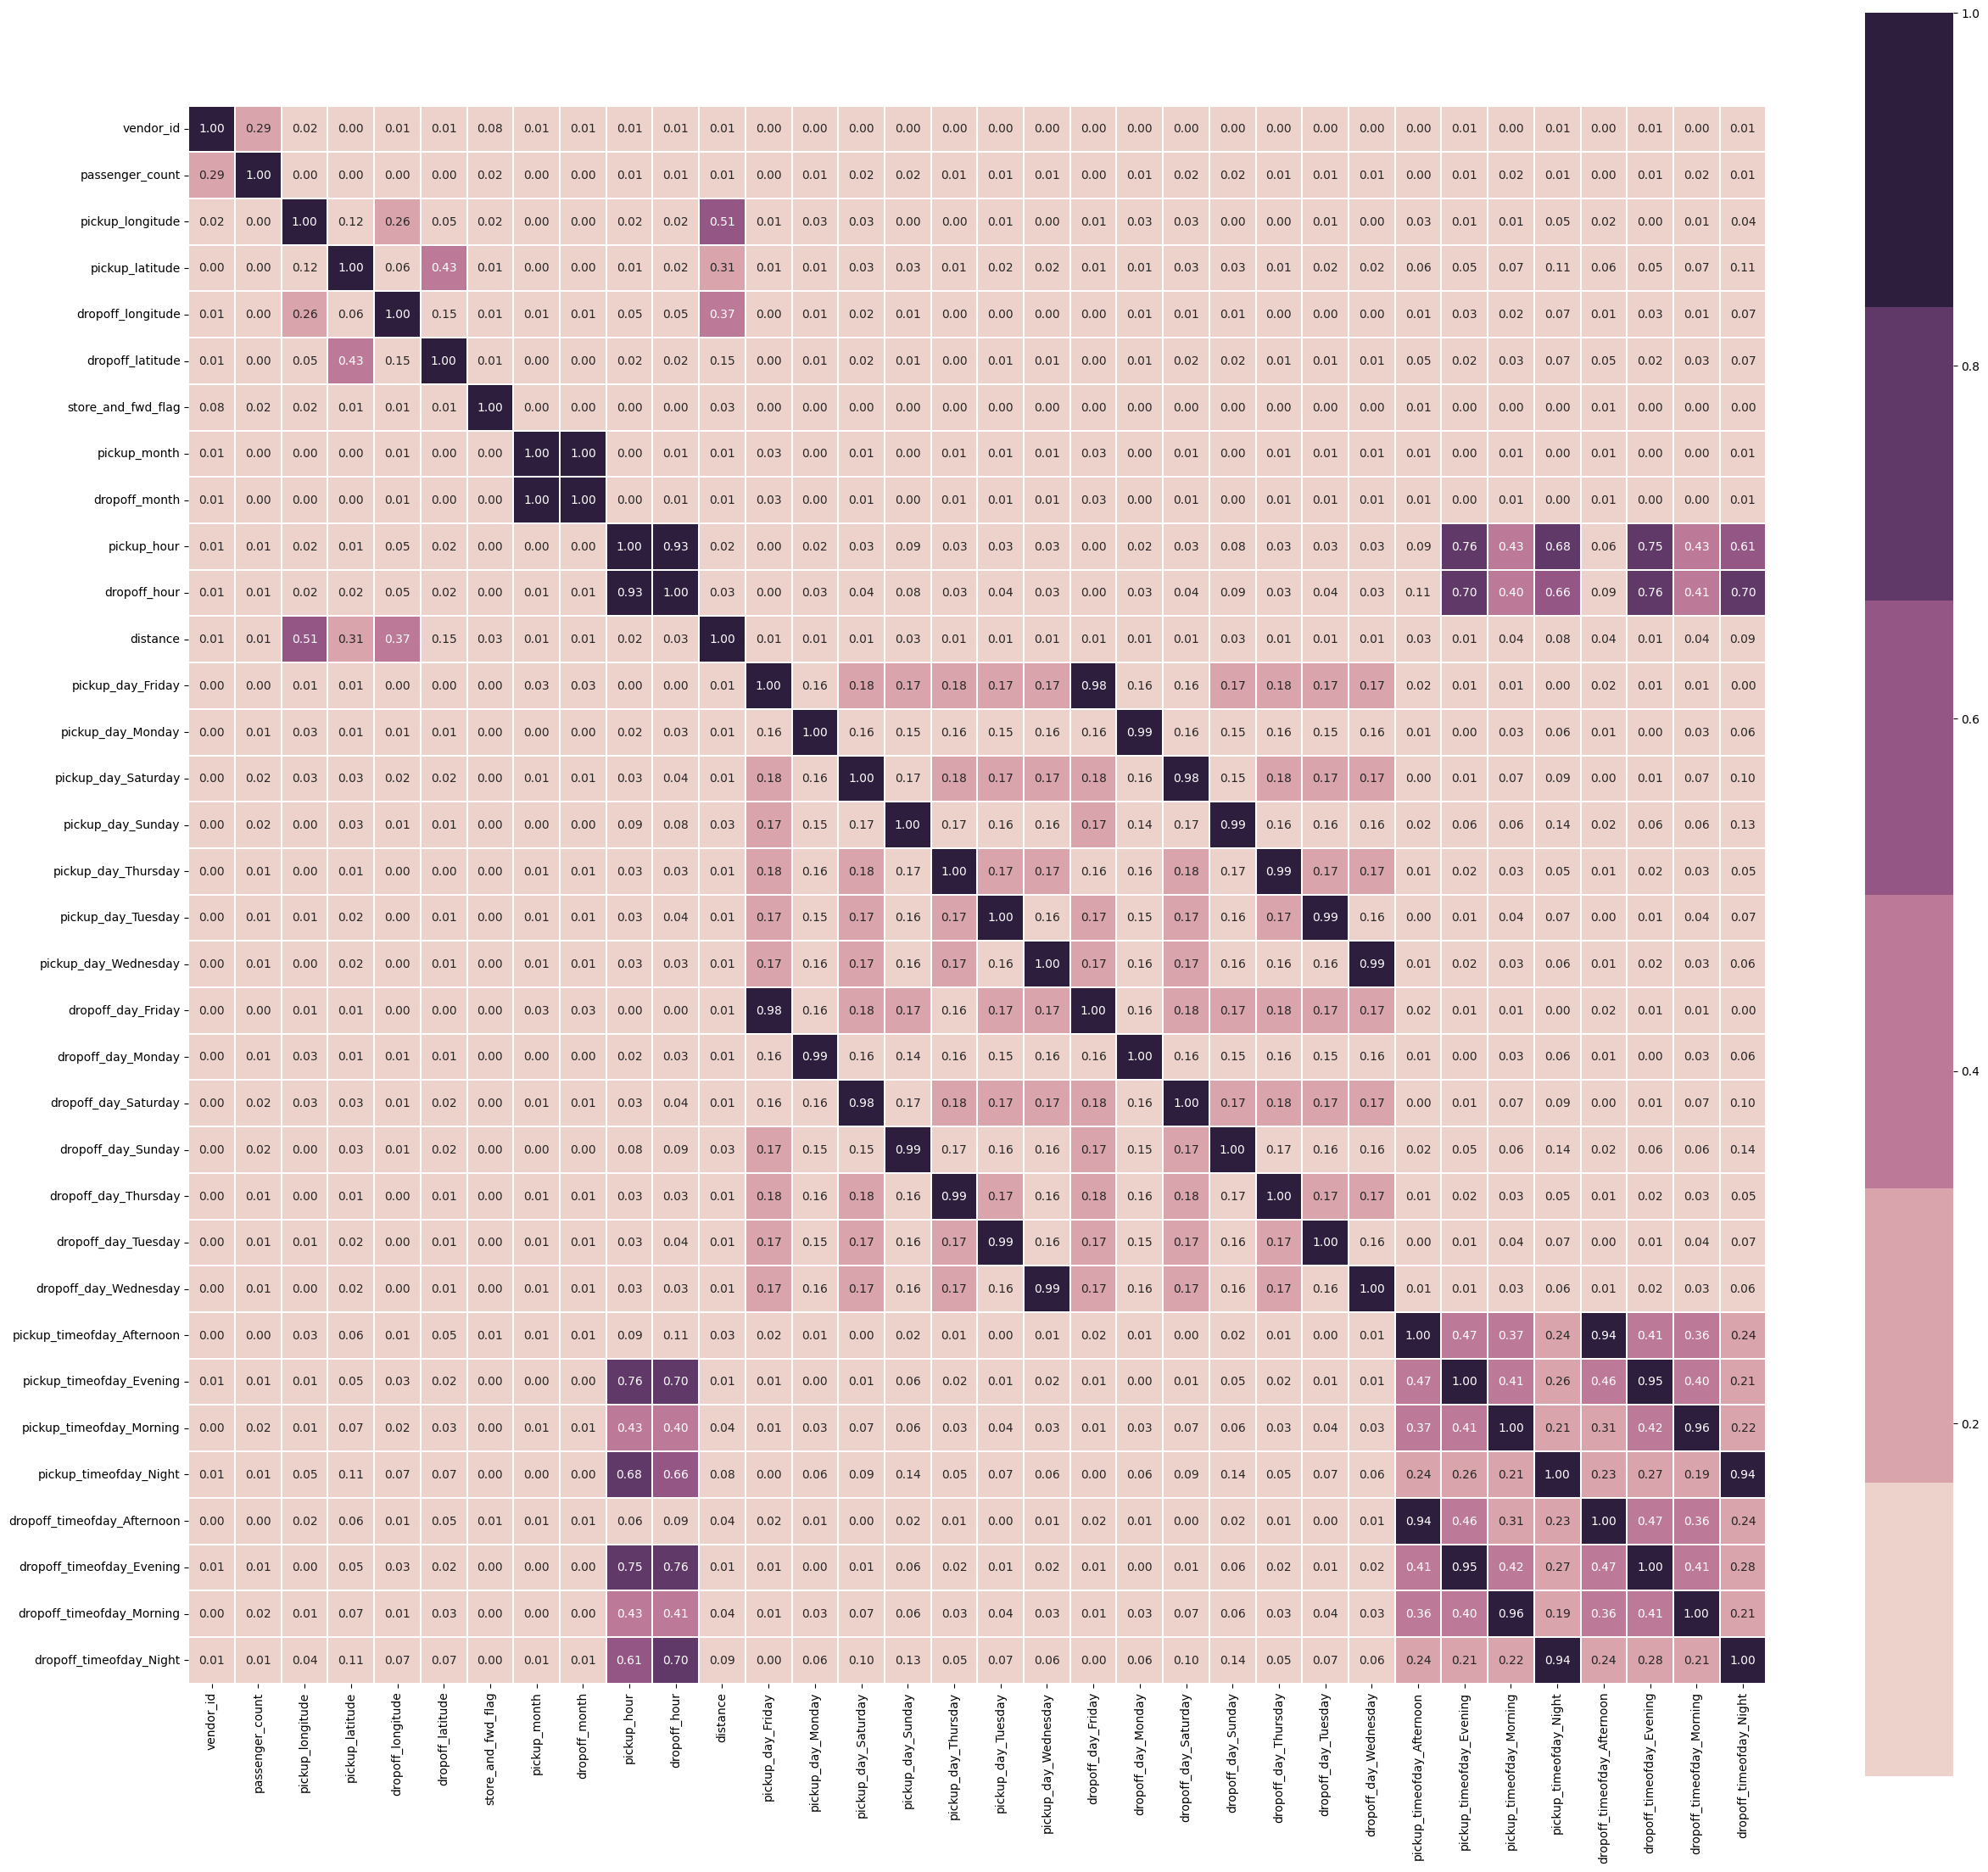

In [ ]:
# Creating a heatmap to visualize correlation between features
fig, axes = plt.subplots(figsize=(30, 30))
corr = abs(x.corr())
sns.heatmap(corr, annot = True, ax = axes, linewidths = 0.1, fmt = '.2f', square = True, cbar_kws = {'shrink': 0.9}, cmap = sns.cubehelix_palette())
plt.show()

There are multiple time-related columns extremely correlated amongst pickup and dropoff values. This is understandable, as most trips are shorter than 1 hour, and columns are bound to follow similar patterns.

So, we remove the one with higher aggregate correlation score.

In [ ]:
# Pickup and Dropoff Month
print('Pickup Month:', sum(corr['pickup_month']), '\nDropoff Month:', sum(corr['dropoff_month']))

Pickup Month: 2.233840440524028 
Dropoff Month: 2.234830883401312


In [60]:
x = x.drop('pickup_month', axis = 1)

In [ ]:
# Pickup and Dropoff Hour
print('Pickup Hour:', sum(corr['pickup_hour']), '\nDropoff Hour:', sum(corr['dropoff_hour']))

Pickup Hour: 6.343174813349284 
Dropoff Hour: 6.431423544803769


In [61]:
x = x.drop('dropoff_hour', axis = 1)

In [ ]:
# Pickup and Dropoff Day
c = pd.DataFrame({'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 'Pickup': [sum(corr['pickup_day_Monday']), sum(corr['pickup_day_Tuesday']), sum(corr['pickup_day_Wednesday']), sum(corr['pickup_day_Thursday'
]), sum(corr['pickup_day_Friday']), sum(corr['pickup_day_Saturday']), sum(corr['pickup_day_Sunday'])], 'Dropoff': [sum(corr['dropoff_day_Monday']), sum(corr['dropoff_day_Tuesday']), sum(corr['dropoff_day_Wednesday']), sum(corr['dropoff_day_Thursday']), sum(corr['dropoff_day_Friday']), sum(corr['dropoff_day_Saturday']), sum(corr['dropoff_day_Sunday'])]})
c

Day    Pickup   Dropoff
0     Monday  4.211129  4.212485
1    Tuesday  4.340536  4.342220
2  Wednesday  4.359843  4.361598
3   Thursday  4.362553  4.367133
4     Friday  4.199552  4.191175
5   Saturday  4.584013  4.583154
6     Sunday  4.761898  4.766333

In [62]:
x = x.drop(['dropoff_day_Monday', 'dropoff_day_Tuesday', 'dropoff_day_Wednesday', 'dropoff_day_Thursday', 'pickup_day_Friday', 'pickup_day_Saturday', 'dropoff_day_Sunday'], axis = 1)

In [ ]:
# Pickup and Dropoff Time
c = pd.DataFrame({'Time': ['Morning', 'Afternoon', 'Evening', 'Night'], 'Pickup': [sum(corr['pickup_timeofday_Morning']), sum(corr['pickup_timeofday_Afternoon']), sum(corr['pickup_timeofday_Evening']), sum(corr['pickup_timeofday_Night'])], 'Dropoff': [sum(corr['dropoff_timeofday_Morning']), sum(corr['dropoff_timeofday_Afternoon']), sum(corr['dropoff_timeofday_Evening']), sum(corr['dropoff_timeofday_Night'])]})
c

Time    Pickup   Dropoff
0    Morning  5.447443  5.436662
1  Afternoon  4.584674  4.528660
2    Evening  6.028579  6.100301
3      Night  5.993163  5.999308

In [63]:
x = x.drop(['pickup_timeofday_Morning', 'pickup_timeofday_Afternoon', 'dropoff_timeofday_Evening', 'dropoff_timeofday_Night'], axis = 1)

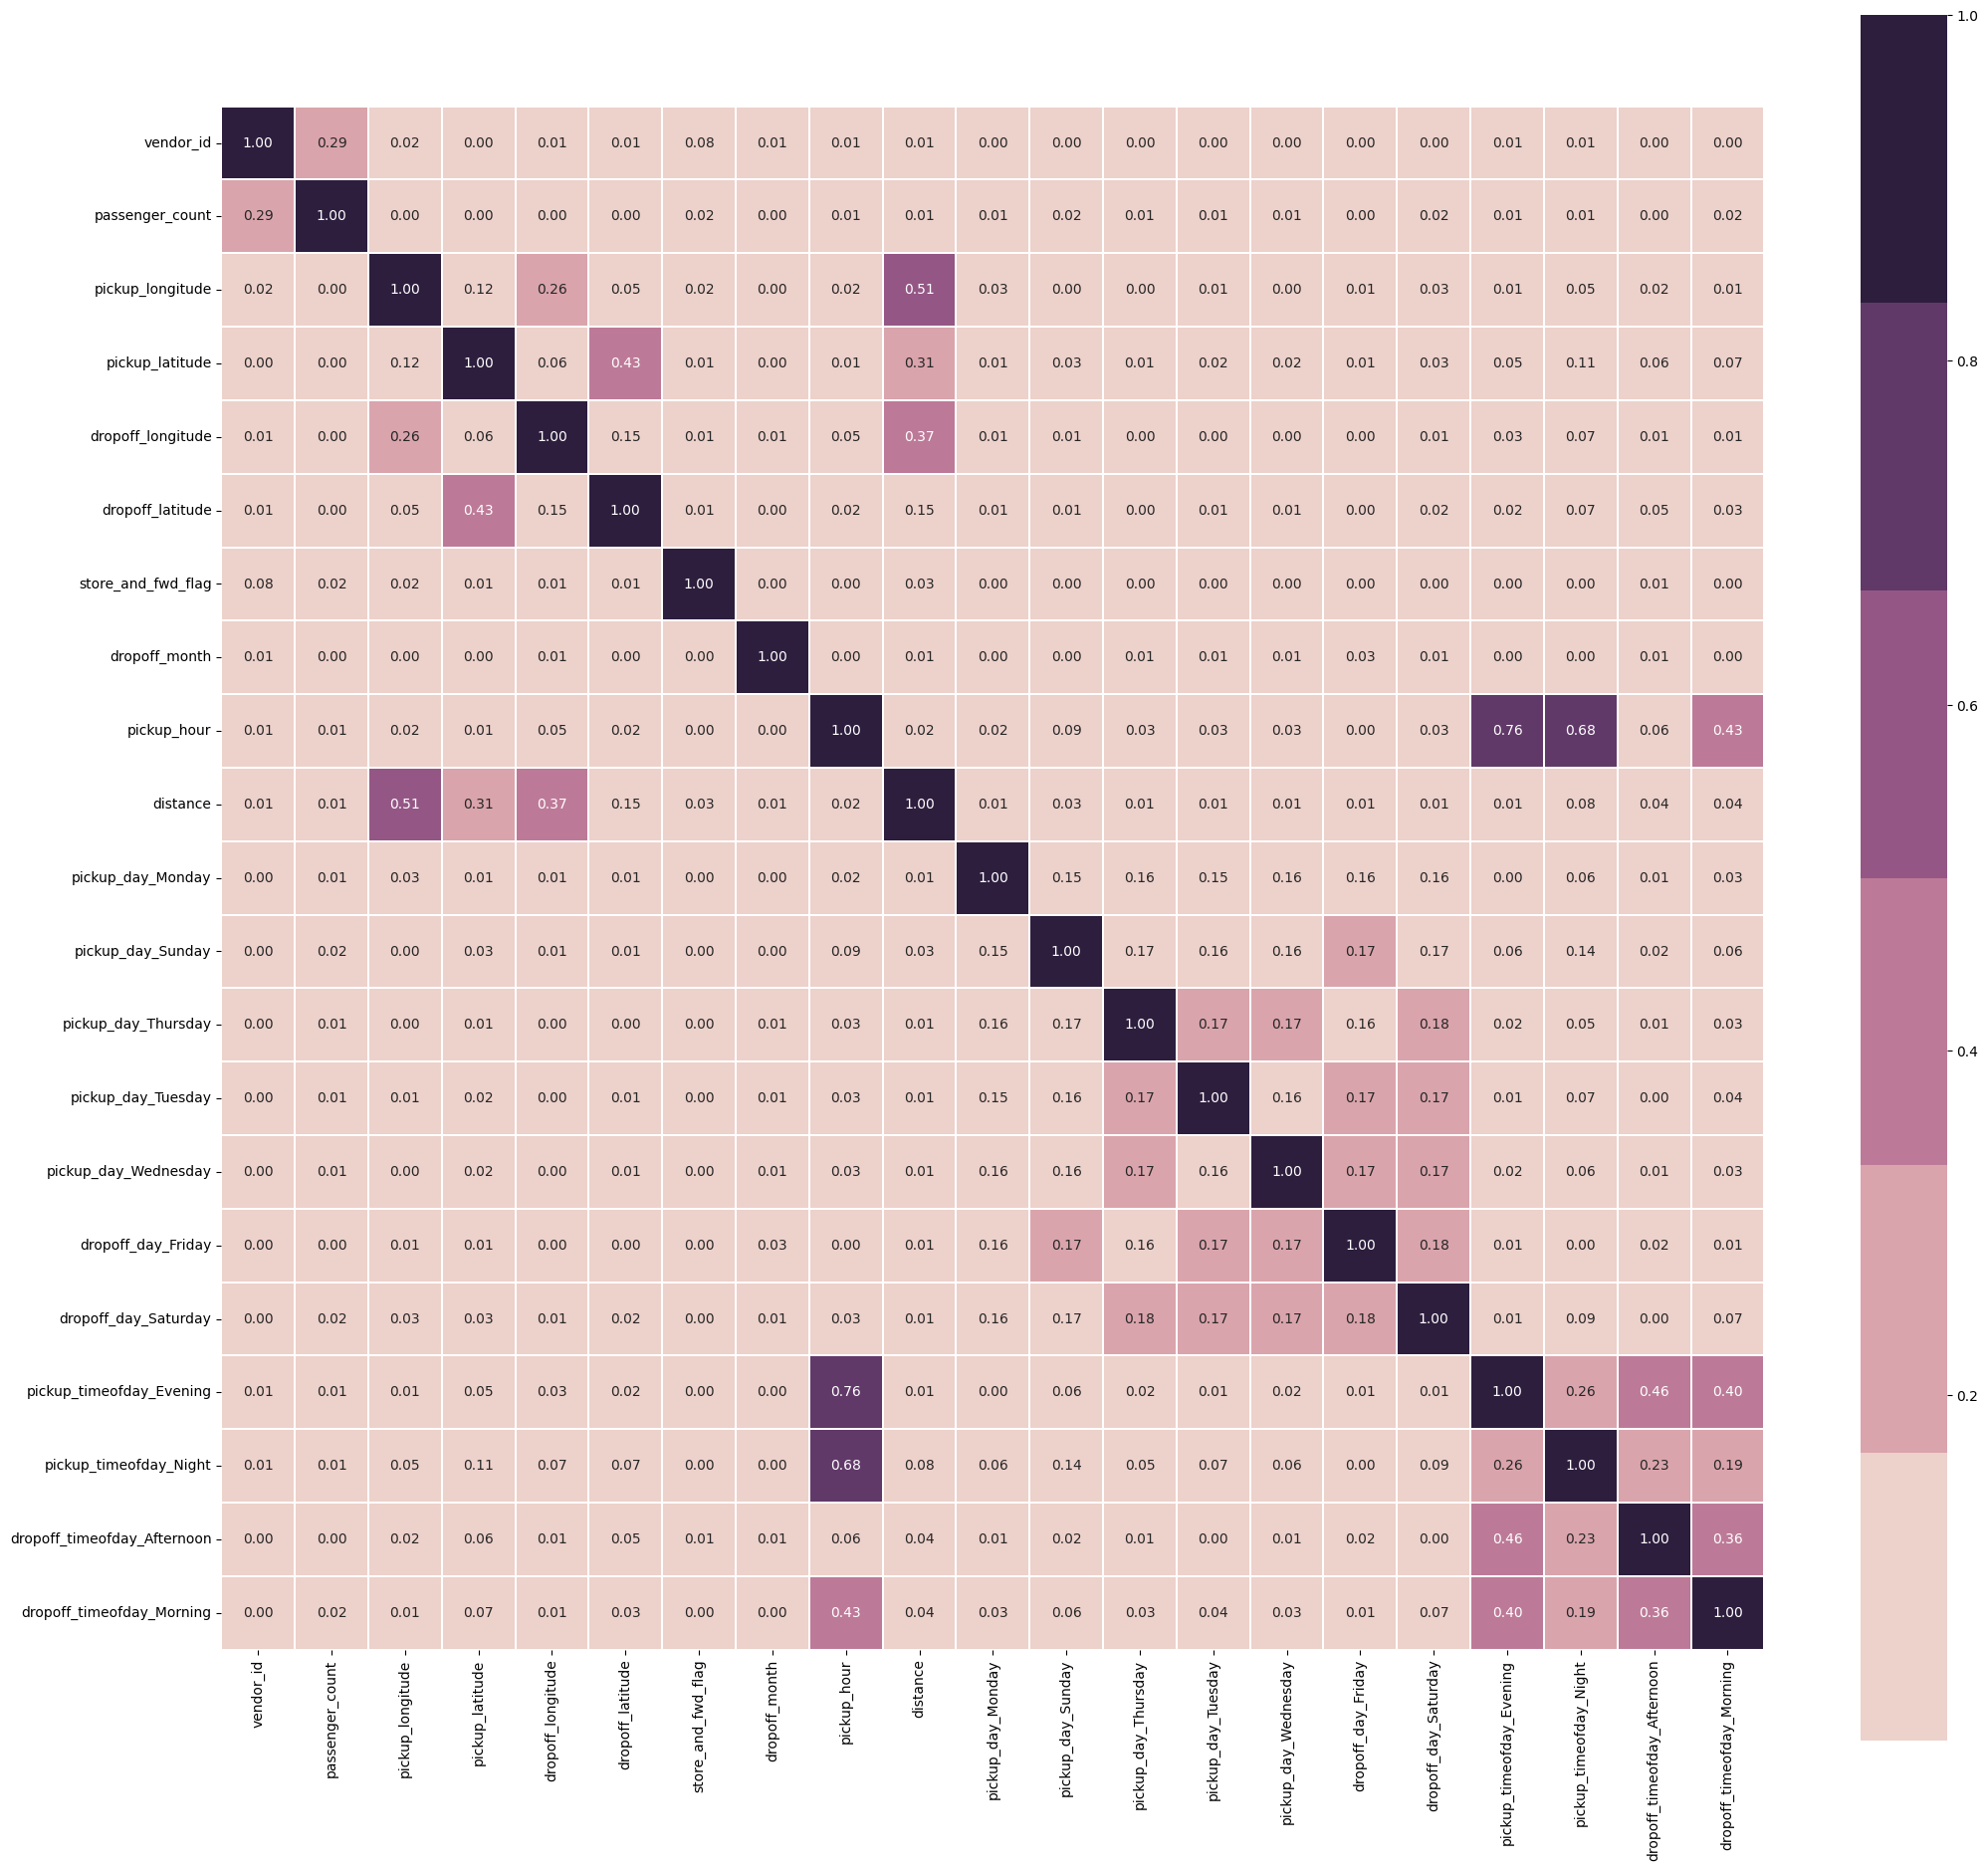

In [ ]:
# Visualize correlation matrix for remaining features again
fig, axes = plt.subplots(figsize=(25, 25))
corr = abs(x.corr())
sns.heatmap(corr, annot = True, ax = axes, linewidths = 0.1, fmt = '.2f', square = True, cbar_kws = {'shrink': 0.9}, cmap = sns.cubehelix_palette())
plt.show()

We also remove pickup hour as it has a high correlation with multiple variables of timeofday [>0.7]

This is likely because timeofday was created using pickup hour.

In [64]:
# Removing Pickup_Hour
x = x.drop(['pickup_hour'], axis = 1)
cols = x.columns

### Using Lasso Regularization

In [65]:
# Importing libraries required for feature selection

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)

Now we create a pipeline object, to enable easy scaling and model fitting for optimization.

We use GridSearchCV to choose an optimal value of alpha for Lasso regression, and use neg_mean_squared_error because the grid search tries to maximize the performance metrics, so we add a minus sign to minimize the mean squared error.

Using this, we determine **feature importance**.

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()), ('model', Lasso())])
cv = GridSearchCV(pipeline, {'model__alpha': np.array([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 10])}, cv = 5, scoring = 'neg_mean_squared_error', verbose = 3)

In [ ]:
cv.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........model__alpha=0.001;, score=-134212.556 total time= 1.5min
[CV 2/5] END ..........model__alpha=0.001;, score=-135804.046 total time= 1.0min
[CV 3/5] END ..........model__alpha=0.001;, score=-135257.917 total time= 1.0min
[CV 4/5] END ..........model__alpha=0.001;, score=-134517.144 total time=  58.5s
[CV 5/5] END ..........model__alpha=0.001;, score=-134240.853 total time=  58.8s
[CV 1/5] END ...........model__alpha=0.01;, score=-134213.295 total time=  44.2s
[CV 2/5] END ...........model__alpha=0.01;, score=-135803.835 total time=  44.3s
[CV 3/5] END ...........model__alpha=0.01;, score=-135258.128 total time=  44.2s
[CV 4/5] END ...........model__alpha=0.01;, score=-134517.265 total time=  45.8s
[CV 5/5] END ...........model__alpha=0.01;, score=-134240.890 total time=  45.0s
[CV 1/5] END ............model__alpha=0.1;, score=-134225.580 total time=  16.2s
[CV 2/5] END ............model__alpha=0.1;, score

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([1.e-03, 1.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01, 1.e+00,
       1.e+01])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
cv.best_params_

{'model__alpha': 0.001}

In [ ]:
coff = cv.best_estimator_.named_steps['model'].coef_

In [ ]:
feature_imp = pd.DataFrame({'Feature': cols, 'Regression Coefficient': np.abs(coff)})
feature_imp.sort_values(by = ['Regression Coefficient'], ascending = False)

Feature  Regression Coefficient
8                      distance              507.329245
16     pickup_timeofday_Evening              173.671973
17       pickup_timeofday_Night              158.397914
19    dropoff_timeofday_Morning              139.608441
18  dropoff_timeofday_Afternoon              100.744631
10            pickup_day_Sunday               66.283406
9             pickup_day_Monday               49.863010
15         dropoff_day_Saturday               47.538031
5              dropoff_latitude               40.397151
2              pickup_longitude               38.943997
4             dropoff_longitude               33.474498
7                 dropoff_month               28.505721
12           pickup_day_Tuesday               26.917686
3               pickup_latitude               24.846281
14           dropoff_day_Friday               23.094853
13         pickup_day_Wednesday               18.957573
11          pickup_day_Thursday               15.322615
1               passenger_count                4.758209
6            store_and_fwd_flag                1.594066
0                     vendor_id                0.790027

To visualize this, we use relative importance of each feature and use feature coefficients to determine variable importance.

In [ ]:
temp = np.abs(coff)
per = [i*100/sum(temp) for i in temp]

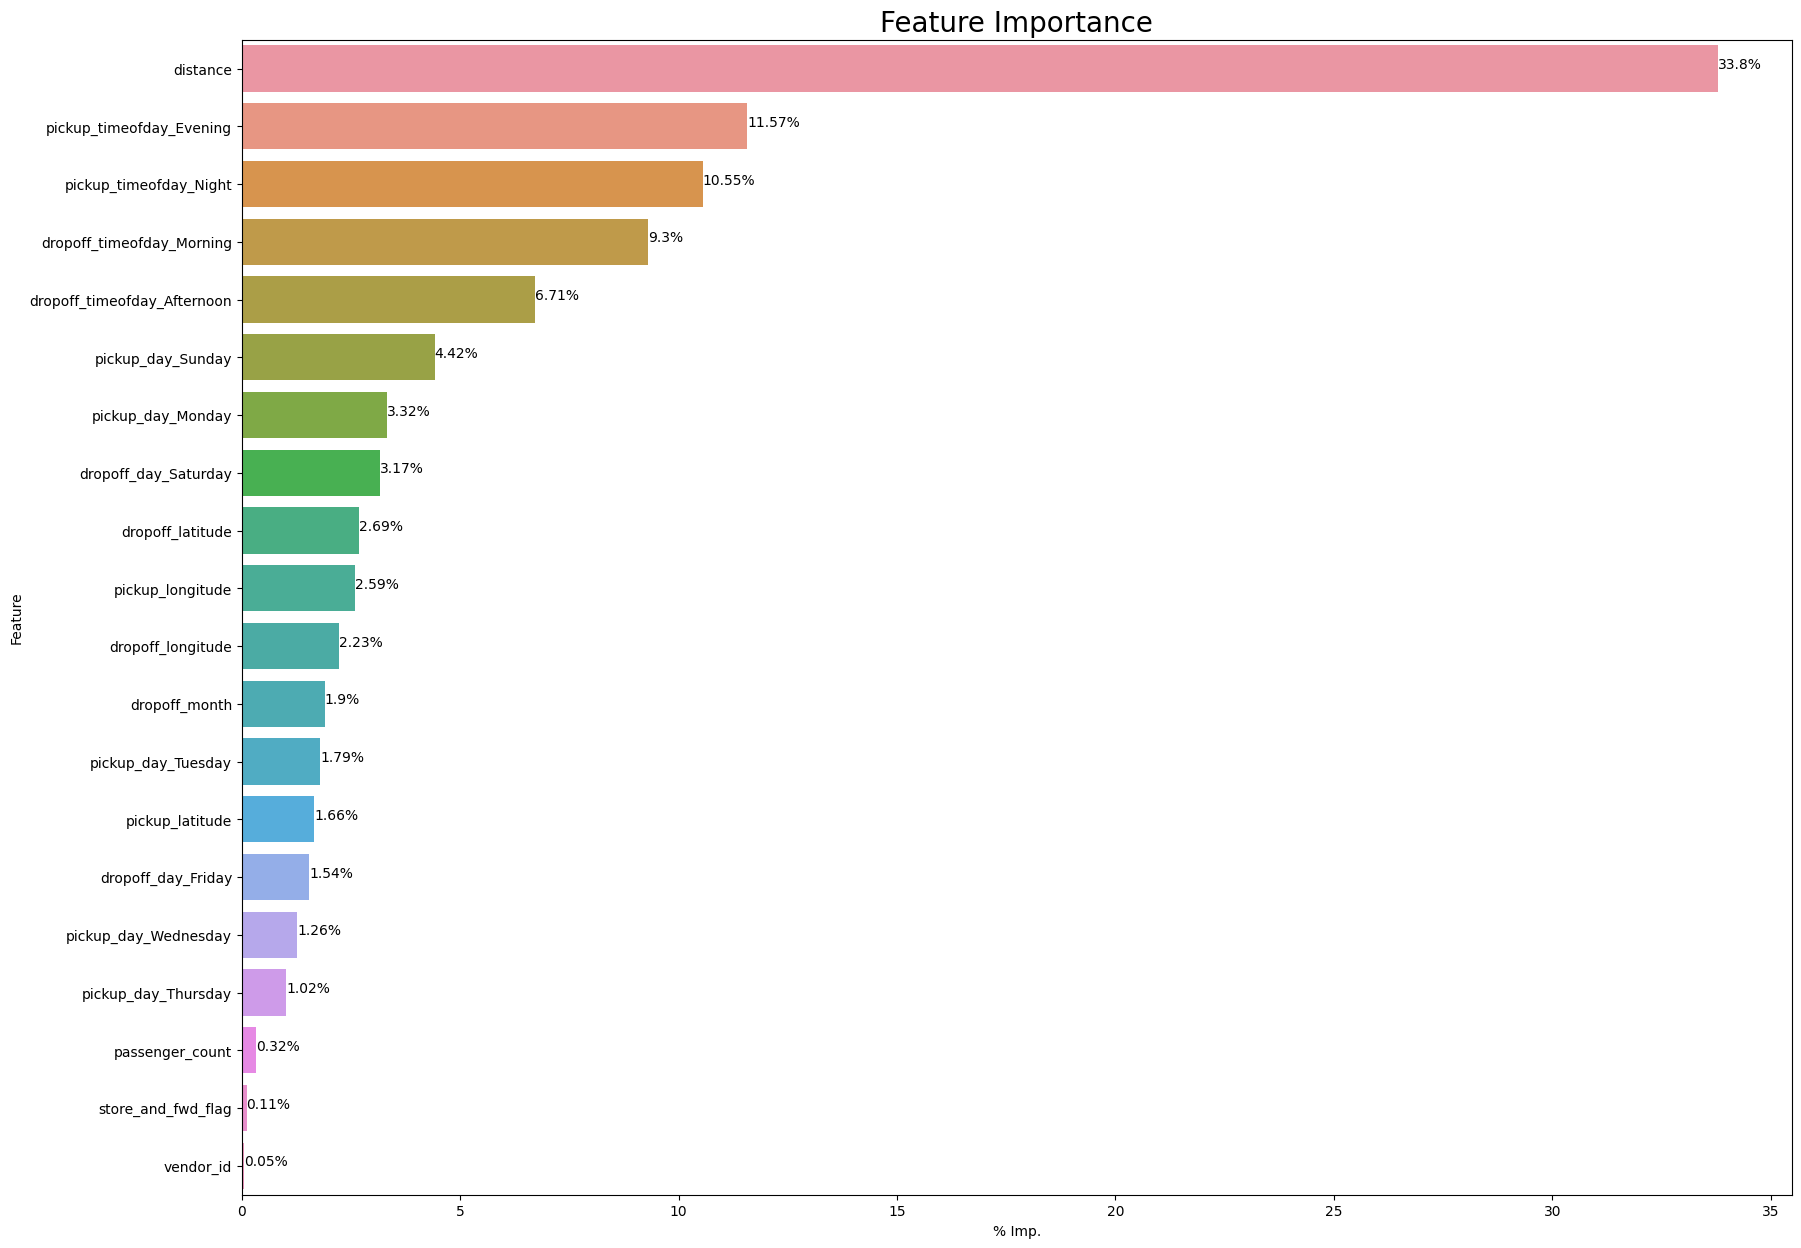

In [ ]:
importance = pd.DataFrame({'Feature': cols, '% Imp.': per})
importance.sort_values(by = ['% Imp.'], ascending = False, inplace = True)
plt.figure(figsize = (20, 15))
plt.title('Feature Importance', fontsize = 20)
sns.barplot(x = '% Imp.', y = 'Feature', data = importance, orient = 'h')
for i, val in enumerate(importance['% Imp.']):
  plt.text(val, i, str(round(val, 2))+'%')
plt.show()

Here, we can see the relative importance of features for determining trip duration. We can use this information to select more relevant features without losing much data.

Lasso Regularization drastically reduces less important features to zero, though none are reduced to 0 here.

However, we can also see that the last 3 features contribute extremely little to the *trip_duration* and have extremely low coefficients. We decide a a cutoff of atleast 1% contribution of coefficients when estimated using Lasso Regularization and remove them. This is done to reduce the unnecessary features which increase model complexity.

In [66]:
# removing features with extremely low coefficients

x = x.drop(['vendor_id', 'store_and_fwd_flag', 'passenger_count'], axis = 1)
cols = x.columns

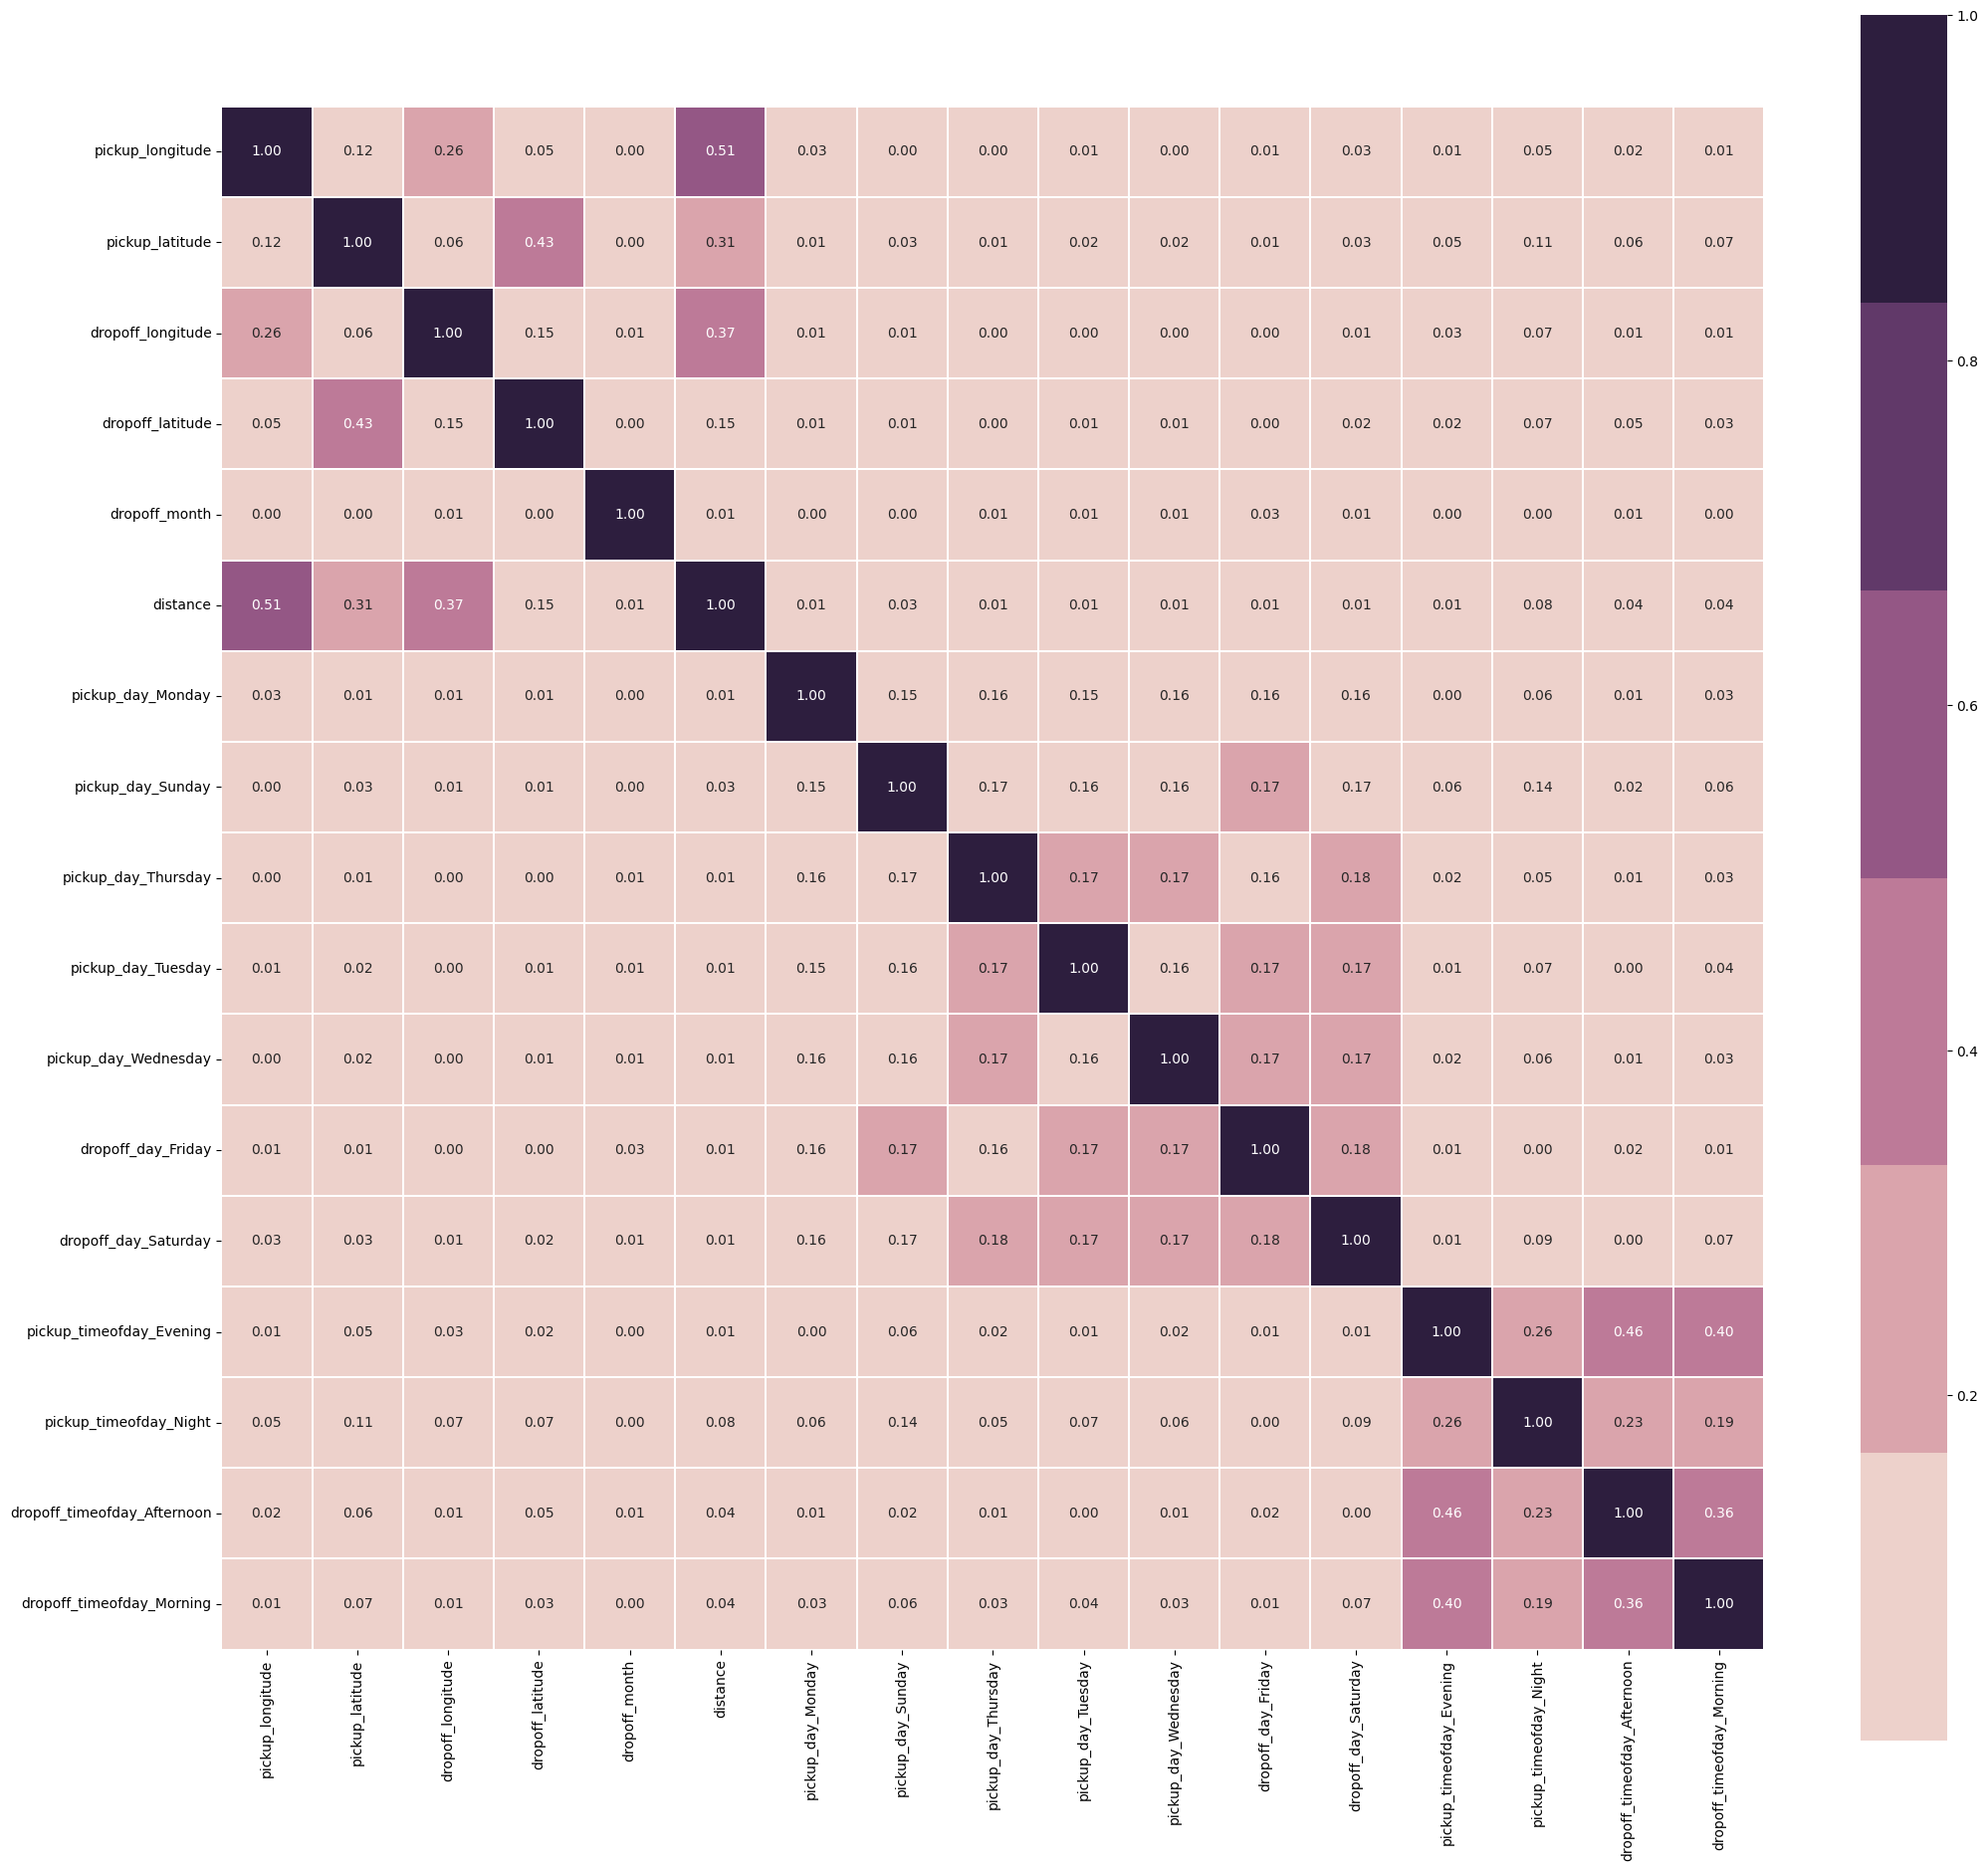

In [ ]:
# Visualizing correlatioon matrix again to ensure no collinearity remains.

fig, axes = plt.subplots(figsize=(25, 25))
corr = abs(x.corr())
sns.heatmap(corr, annot = True, ax = axes, linewidths = 0.1, fmt = '.2f', square = True, cbar_kws = {'shrink': 0.9}, cmap = sns.cubehelix_palette())
plt.show()

As we can see, there is no features with correlation above 0.7

## Data Modelling

In [ ]:
# Checking the amount of Data Available

print('No. of Independent Variables:', x.shape[1])
print('No. of Dependent Variables: 1')
print('No. of Data points Available:', x.shape[0])

No. of Independent Variables: 17
No. of Dependent Variables: 1
No. of Data points Available: 1435846


Next, we Standardize the whole data using Standard Scaler.

In [67]:
# Adding target variable to the end before transforming, and generating the dataset with required columns.
# we create a new dataframe to preserve the original in case we need the data again.
cols = list(cols)
cols.append('trip_duration')
df = data[cols]
df.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   dropoff_month  distance  pickup_day_Monday  pickup_day_Sunday  \
0              3  1.498523                  1                  0   
1              6  1.805510                  0                  1   
2              1  6.385108                  0                  0   
3              4  1.485501                  0                  0   
4              3  1.188590                  0                  0   

   pickup_day_Thursday  pickup_day_Tuesday  pickup_day_Wednesday  \
0                    0                   0                     0   
1                    0                   0                     0   
2                    0                   1                     0   
3                    0                   0                     1   
4                    0                   0                     0   

   dropoff_day_Friday  dropoff_day_Saturday  pickup_timeofday_Evening  \
0                   0                     0                         0   
1                   0                     0                         0   
2                   0                     0                         0   
3                   0                     0                         1   
4                   0                     1                         0   

   pickup_timeofday_Night  dropoff_timeofday_Afternoon  \
0                       0                            1   
1                       1                            0   
2                       0                            1   
3                       0                            0   
4                       0                            1   

   dropoff_timeofday_Morning  trip_duration  
0                          0            455  
1                          0            663  
2                          0           2124  
3                          0            429  
4                          0            435

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435846 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   pickup_longitude             1435846 non-null  float64
 1   pickup_latitude              1435846 non-null  float64
 2   dropoff_longitude            1435846 non-null  float64
 3   dropoff_latitude             1435846 non-null  float64
 4   dropoff_month                1435846 non-null  int64  
 5   distance                     1435846 non-null  float64
 6   pickup_day_Monday            1435846 non-null  uint8  
 7   pickup_day_Sunday            1435846 non-null  uint8  
 8   pickup_day_Thursday          1435846 non-null  uint8  
 9   pickup_day_Tuesday           1435846 non-null  uint8  
 10  pickup_day_Wednesday         1435846 non-null  uint8  
 11  dropoff_day_Friday           1435846 non-null  uint8  
 12  dropoff_day_Saturday         1435846 non-n

In [69]:
# Transforming data using Standard Scaler

scaler = StandardScaler()
df = scaler.fit_transform(df)

In [70]:
# Redefining independent and dependent variables from transformed data

x = df[:, :-1]
y = df[:, -1]

In [71]:
x.shape

(1435846, 17)

In [72]:
y.shape

(1435846,)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)

### Linear Regression

> Building a simple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

> Model Evalulation

In [74]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
# Using multiple Evalulation metrics

r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
k = 17
print('RMSE:\t\t\t', np.sqrt(mse(y_test, y_pred)))
print('Mean Absolute Error:\t', mae(y_test, y_pred))
print('R-square:\t\t', r2)
print('Adjusted R-square:\t', (1 - (1-r2)*(n-1)/(n-k-1)))

RMSE:			 0.6022355881169705
Mean Absolute Error:	 0.4291256857539124
R-square:		 0.6377309589024034
Adjusted R-square:	 0.6377166611104875


We check the training error as well to check for overfitting.

In [ ]:
y_train_pred = model.predict(x_train)
print('Training R-square:\t', r2_score(y_train, y_train_pred))
print('Testing R-square:\t', r2_score(y_test, y_pred))

Training R-square:	 0.635727873343485
Testing R-square:	 0.6377309589024034


Since both training and testing R-square values are similar and sufficiently high, it means that the data is neither overfitting, nor underfitting.

> As we can see here, our Linear model can only explain about 63.8% of the variance seen in the data. Hence, we apply more Regression methods to see which fit best.

### Decision Tree Regressor

> Building a simple Decision Tree Regressor Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(random_state = 42)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

> Model Evalulation

In [ ]:
# Using multiple Evalulation metrics

r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
k = 17
print('RMSE:\t\t\t', np.sqrt(mse(y_test, y_pred)))
print('Mean Absolute Error:\t', mae(y_test, y_pred))
print('R-square:\t\t', r2)
print('Adjusted R-square:\t', (1 - (1-r2)*(n-1)/(n-k-1)))

RMSE:			 0.6586499632487999
Mean Absolute Error:	 0.44158584641769993
R-square:		 0.5666809985276544
Adjusted R-square:	 0.566663896583482


As we can see, the Decision Tree Regressor has performed poorly with an r2 score of 0.56, which is low. However this could be due to default hyperparameters set up in the Regressor.

>So now, we will perform hyperparameter tuning to see if we can improve the model performance.

#### Hyperparameter Tuning

We test and tune multiple hyperparameters to see which combination gives the best performance.

In [ ]:
# Testing maximum depth, number of samples to split, no. of samples for leaf, and create a hyperparameter grid to be tuned using GridsearchCV

max_depth = [4, 6, 8, 10]
min_samples_split = [10, 20, 30]
min_samples_leaf = [8, 16, 22]

hyperparam_dict = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [ ]:
model = DecisionTreeRegressor(random_state = 42)

In [ ]:
# Using GridSearchCV to find the best params

cv = GridSearchCV(estimator = model, param_grid = hyperparam_dict, cv = 5, verbose = 3, scoring = 'r2')
cv.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=4, min_samples_leaf=8, min_samples_split=10;, score=0.653 total time=   4.0s
[CV 2/5] END max_depth=4, min_samples_leaf=8, min_samples_split=10;, score=0.652 total time=   3.6s
[CV 3/5] END max_depth=4, min_samples_leaf=8, min_samples_split=10;, score=0.651 total time=   3.2s
[CV 4/5] END max_depth=4, min_samples_leaf=8, min_samples_split=10;, score=0.654 total time=   3.2s
[CV 5/5] END max_depth=4, min_samples_leaf=8, min_samples_split=10;, score=0.653 total time=   4.0s
[CV 1/5] END max_depth=4, min_samples_leaf=8, min_samples_split=20;, score=0.653 total time=   3.5s
[CV 2/5] END max_depth=4, min_samples_leaf=8, min_samples_split=20;, score=0.652 total time=   3.2s
[CV 3/5] END max_depth=4, min_samples_leaf=8, min_samples_split=20;, score=0.651 total time=   3.2s
[CV 4/5] END max_depth=4, min_samples_leaf=8, min_samples_split=20;, score=0.654 total time=   4.0s
[CV 5/5] END max_depth=4, min_samples_

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [8, 16, 22],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=3)

In [ ]:
cv.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10,
                      random_state=42)

In [ ]:
cv.best_params_

{'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 10}

Now here, **cv** gives the best parameters for our Decision Tree model to be built using best hyperparameters, optimized using GridSearch.

We use it to predict values from test set.

In [ ]:
model2 = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 22, min_samples_split = 10, random_state = 42)
model2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10,
                      random_state=42)

In [ ]:
y_pred = model2.predict(x_test)

> Model Evalulation

In [ ]:
# Using multiple Evalulation metrics

r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
k = 17
print('RMSE:\t\t\t', np.sqrt(mse(y_test, y_pred)))
print('Mean Absolute Error:\t', mae(y_test, y_pred))
print('R-square:\t\t', r2)
print('Adjusted R-square:\t', (1 - (1-r2)*(n-1)/(n-k-1)))

RMSE:			 0.5251695573235641
Mean Absolute Error:	 0.36446408824327264
R-square:		 0.7245153047239806
Adjusted R-square:	 0.7245044320785095


> Model Evalulation

We check the training error as well to check for overfitting.

In [ ]:
y_train_pred = model2.predict(x_train)
print('Training R-square:\t', r2_score(y_train, y_train_pred))
print('Testing R-square:\t', r2_score(y_test, y_pred))

Training R-square:	 0.7264650876226721
Testing R-square:	 0.7245153047239806


Since both training and testing R-square values are not significantly different and sufficiently high, it means that the data is neither overfitting, nor underfitting.

### Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

> Building a simple default Random Forest Regressor model.

In [ ]:
model = RandomForestRegressor(n_estimators = 40, n_jobs = -4, random_state = 42)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=40, n_jobs=-4, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

> Model Evalulation

In [ ]:
# Using multiple Evalulation metrics

r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
k = 17
print('RMSE:\t\t\t', np.sqrt(mse(y_test, y_pred)))
print('Mean Absolute Error:\t', mae(y_test, y_pred))
print('R-square:\t\t', r2)
print('Adjusted R-square:\t', (1 - (1-r2)*(n-1)/(n-k-1)))

RMSE:			 0.46441249650397753
Mean Absolute Error:	 0.31635345222982025
R-square:		 0.7845699985064808
Adjusted R-square:	 0.7845614960594474


Now tuning hyperparameters to optimize Random Forest

#### Hyperparameter Tuning

In [73]:
# Setting up Each hyperparameter to test

n_estimators = [20, 50, 100, 200, 500]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 4, 8, 10]
bootstrap = [True, False]
hyperparam_dict = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
hyperparam_dict

{'n_estimators': [20, 50, 100, 200, 500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 4, 8, 10],
 'bootstrap': [True, False]}

In [74]:
model = RandomForestRegressor()

In [75]:
# Using RandomizedSearchCV to find the best params
from sklearn.model_selection import RandomizedSearchCV

cv = RandomizedSearchCV(estimator = model, param_distributions = hyperparam_dict, n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

As we observed, when optimizing for the whole 1.43M datapoints, there was a horrible space and time complexity, as there were 300 fits, which would take too much time and space to calculate.

Hence, we take a sample of 10000 random points from the dataset and fit the RandomizedSearchCV to find best parameters.

In [76]:
df = data[cols]
df.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   dropoff_month  distance  pickup_day_Monday  pickup_day_Sunday  \
0              3  1.498523                  1                  0   
1              6  1.805510                  0                  1   
2              1  6.385108                  0                  0   
3              4  1.485501                  0                  0   
4              3  1.188590                  0                  0   

   pickup_day_Thursday  pickup_day_Tuesday  pickup_day_Wednesday  \
0                    0                   0                     0   
1                    0                   0                     0   
2                    0                   1                     0   
3                    0                   0                     1   
4                    0                   0                     0   

   dropoff_day_Friday  dropoff_day_Saturday  pickup_timeofday_Evening  \
0                   0                     0                         0   
1                   0                     0                         0   
2                   0                     0                         0   
3                   0                     0                         1   
4                   0                     1                         0   

   pickup_timeofday_Night  dropoff_timeofday_Afternoon  \
0                       0                            1   
1                       1                            0   
2                       0                            1   
3                       0                            0   
4                       0                            1   

   dropoff_timeofday_Morning  trip_duration  
0                          0            455  
1                          0            663  
2                          0           2124  
3                          0            429  
4                          0            435

In [79]:
# Taking a sample of 10000 points from data to apply optimization

sample = df.sample(10000, random_state = 42)

In [80]:
# Transforming the sample and dividing into dependent and independent variables

sample = scaler.fit_transform(sample)

xs, ys = sample[:, :-1], sample[:, -1]

In [81]:
# Creating traing and testing sets for the sample

xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, train_size = 0.7, random_state = 42)

In [84]:
cv = RandomizedSearchCV(estimator = model, param_distributions = hyperparam_dict, n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

In [82]:
cv.fit(xs_train, ys_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 50, 100, 200,
                                                         500]},
                   random_state=42, verbose=2)

In [83]:
cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [84]:
model = RandomForestRegressor(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 8, max_features = 'auto', max_depth = 90, bootstrap = True, random_state = 42)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=90, max_features='auto', min_samples_leaf=8,
                      min_samples_split=5, n_estimators=200, random_state=42)

In [87]:
y_pred = model.predict(x_test)

> Model Evalulation

In [88]:
# Using multiple Evalulation metrics to evalulate

r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
k = 17
print('RMSE:\t\t\t', np.sqrt(mse(y_test, y_pred)))
print('Mean Absolute Error:\t', mae(y_test, y_pred))
print('R-square:\t\t', r2)
print('Adjusted R-square:\t', (1 - (1-r2)*(n-1)/(n-k-1)))

RMSE:			 0.457383179502065
Mean Absolute Error:	 0.3100863190037618
R-square:		 0.7910421129129166
Adjusted R-square:	 0.7910338659029604


We check the training error as well to check for overfitting.

In [89]:
y_train_pred = model.predict(x_train)
print('Training R-square:\t', r2_score(y_train, y_train_pred))
print('Testing R-square:\t', r2_score(y_test, y_pred))

Training R-square:	 0.8692307358371449
Testing R-square:	 0.7910421129129166


Since the training R-square is higher than testing R-square, but the testing R-square is high as well, there seems to be a slight overfitting int the model.

So now, we will use XGBoost to optimize and boost our model.

### XGBoost Regressor

In [75]:
import xgboost as xgb

First we fit a default Boosted Regression model. This will boost the DT regression model.

In [82]:
model = xgb.XGBRegressor(booster = 'gbtree')

In [83]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
y_pred = model.predict(x_test)

> Model Evalulation

In [85]:
# Using multiple Evalulation metrics to evalulate

r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
k = 17
print('RMSE:\t\t\t', np.sqrt(mse(y_test, y_pred)))
print('Mean Absolute Error:\t', mae(y_test, y_pred))
print('R-square:\t\t', r2)
print('Adjusted R-square:\t', (1 - (1-r2)*(n-1)/(n-k-1)))

RMSE:			 0.4636447004041117
Mean Absolute Error:	 0.31785345849479957
R-square:		 0.7852817346724815
Adjusted R-square:	 0.7852732603157745


#### Hyperparameter Tuning

In [87]:
model = xgb.XGBRegressor(eval_metric = 'rmsle')

In [89]:
# Next, we use GridSearchCV to perform hyperparameter selection

max_depth = [4, 6, 8]
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.01, 0.1, 0.2, 0.5]
grid = {'max_depth': max_depth, 'n_estimators': n_estimators, 'learning_rate': learning_rate}
cv = GridSearchCV(estimator = model, param_grid = grid, cv = 3)
cv.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmsle', feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.2], 'max_depth': [8],
                         'n_estimators': [200]})

In [90]:
cv.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}

In [91]:
# Building XGBRegressor model using the given best parameters

model2 = xgb.XGBRegressor(max_depth = 8, learning_rate = 0.2, n_estimators = 200, eval_metric = 'rmsle')
model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [92]:
y_pred2 = model2.predict(x_test)

> Model Evalulation

In [93]:
# Using multiple Evalulation metrics to evalulate

r2 = r2_score(y_test, y_pred2)
n = x_test.shape[0]
k = 17
print('RMSE:\t\t\t', np.sqrt(mse(y_test, y_pred2)))
print('Mean Absolute Error:\t', mae(y_test, y_pred2))
print('R-square:\t\t', r2)
print('Adjusted R-square:\t', (1 - (1-r2)*(n-1)/(n-k-1)))

RMSE:			 0.4519553054013317
Mean Absolute Error:	 0.3069848890398595
R-square:		 0.7959721901946542
Adjusted R-square:	 0.7959641377616866


We check the training error as well to check for overfitting.

In [96]:
y_train_pred2 = model2.predict(x_train)
print('Training R-square:\t', r2_score(y_train, y_train_pred2))
print('Testing R-square:\t', r2_score(y_test, y_pred2))

Training R-square:	 0.8171979997741577
Testing R-square:	 0.7959721901946542


As we can see, the training and testing R-square values are very close and sufficiently high. So there is a less chance of overfitting in the model.

## Model Selection

Using evalulation metrics, we compare different models and select best one for further processing.

In [112]:
model_dict = {'': ['Model 1', 'Model 2', 'Model 3', 'Model 4'], 'Model Name': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor'], 'RMS Error': [0.6022, 0.5252, 0.4574, 0.4519], 'MA Error': [0.4291, 0.3645, 0.3101, 0.3069], 'Training R-square': [0.6357, 0.7265, 0.8692, 0.8172], 'Testing R-square': [0.6377, 0.7245, 0.7910, 0.7959]}
model_df = pd.DataFrame(model_dict)
model_df.set_index('', inplace = True)
model_df

Model Name  RMS Error  MA Error  Training R-square  \
                                                                           
Model 1        Linear Regression     0.6022    0.4291             0.6357   
Model 2  Decision Tree Regressor     0.5252    0.3645             0.7265   
Model 3  Random Forest Regressor     0.4574    0.3101             0.8692   
Model 4        XGBoost Regressor     0.4519    0.3069             0.8172   

         Testing R-square  
                           
Model 1            0.6377  
Model 2            0.7245  
Model 3            0.7910  
Model 4            0.7959

> Now that our Evalulation Metrics are listed, we sort the models based on these metrics.

In [118]:
# Model ranking using RMSE

model_df.sort_values(by = 'RMS Error')[['Model Name', 'RMS Error']]

Model Name  RMS Error
                                           
Model 4        XGBoost Regressor     0.4519
Model 3  Random Forest Regressor     0.4574
Model 2  Decision Tree Regressor     0.5252
Model 1        Linear Regression     0.6022

**XGBRegressor** performs best.

In [119]:
# Model ranking using Mean Absolute Error

model_df.sort_values(by = 'MA Error')[['Model Name', 'MA Error']]

Model Name  MA Error
                                          
Model 4        XGBoost Regressor    0.3069
Model 3  Random Forest Regressor    0.3101
Model 2  Decision Tree Regressor    0.3645
Model 1        Linear Regression    0.4291

**XGBRegressor** performs best.

In [122]:
# Model ranking using Training R-square

model_df.sort_values(by = 'Training R-square', ascending = False)[['Model Name', 'Training R-square']]

Model Name  Training R-square
                                                   
Model 3  Random Forest Regressor             0.8692
Model 4        XGBoost Regressor             0.8172
Model 2  Decision Tree Regressor             0.7265
Model 1        Linear Regression             0.6357

Here, **Random Forest** seems to perform better, however it was overfitting a little in training data.

In [123]:
# Model ranking using Testing R-square

model_df.sort_values(by = 'Testing R-square', ascending = False)[['Model Name', 'Testing R-square']]

Model Name  Testing R-square
                                                  
Model 4        XGBoost Regressor            0.7959
Model 3  Random Forest Regressor            0.7910
Model 2  Decision Tree Regressor            0.7245
Model 1        Linear Regression            0.6377

**XGBRegressor** performs best.

We can see from the Testing R-square values, as well as overall Evalulation Data:

***XGBoost Regressor*** is the superior model amongst all others and performs best. We use results from this model to perform any further predictions.

## Feature Importance

Since we have selected the XGBRegressor model, we use the weightage of features provided by the model to determine feature importance.

In [125]:
imp = model2.feature_importances_
cols.remove('trip_duration')

In [106]:
feature_imp = pd.DataFrame({'Feature': cols, 'Regression Coefficient': imp})
feature_imp

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'dropoff_month',
 'distance',
 'pickup_day_Monday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday',
 'dropoff_day_Friday',
 'dropoff_day_Saturday',
 'pickup_timeofday_Evening',
 'pickup_timeofday_Night',
 'dropoff_timeofday_Afternoon',
 'dropoff_timeofday_Morning',
 'trip_duration']

## Conclusion

* We can see that MSE and R2 and Adjusted R2 which are the metrics used to evaluate the performance of regression model of Linear Regression, Lasso, Ridge, Decision Tree, Random Forest and XGBoost Regressor.
* The Linear models don't show good performance on our training and testing environment.
* From above table we can conclude that XGBoost Regressor (__%) is the best models as compare to the other models to predict the trip duration for a
particular taxi.

In [ ]:
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#The End
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''